# List 2 of Machine Learning course

## Introduction

**The goal** of the notebook is to investigate the performance of the k-nn classification algorithm for three test sets: `IRIS`, `WINE` and `GLASS`.

The notebook will analyse how the algorithm performs with different datasets and examine how the parameter values of the k-nn algorithm affect the results obtained. For this purpose, classical measures of classification quality will be used: `Precision`, `Recall`, `F-score`, `Accuracy` and `MCC`.

In addition, a **cross-validation** procedure for different n-fold sizes and a balanced stratified form will be used within the notebook.

**Datasets:** [IRIS](https://archive.ics.uci.edu/dataset/53/iris), [WINE](https://archive.ics.uci.edu/dataset/109/wine) and [GLASS](https://archive.ics.uci.edu/dataset/109/wine)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from ucimlrepo import fetch_ucirepo
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, \
							precision_score, ConfusionMatrixDisplay, matthews_corrcoef, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, train_test_split, KFold, StratifiedKFold, RepeatedKFold, \
									RepeatedStratifiedKFold, GridSearchCV
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings


## Dataset Loading

In [2]:
iris = datasets.load_iris()
wine = datasets.load_wine()

In [3]:
# data documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris_X_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_y_df = pd.DataFrame(iris['target'], columns=['species'])
iris_y_df['species_names'] = iris_y_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_X_df.head())
display(iris_y_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,species,species_names
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa


In [4]:
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
wine_X_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_y_df = pd.DataFrame(wine['target'], columns=['species'])
wine_y_df['species_names'] = wine_y_df['species'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

display(wine_X_df.head())
display(wine_y_df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,species,species_names
0,0,class_0
1,0,class_0
2,0,class_0
3,0,class_0
4,0,class_0


In [5]:
# data source: https://archive.ics.uci.edu/dataset/42/glass+identification
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
glass_X_df = glass_identification.data.features 
glass_y_df = glass_identification.data.targets
display(glass_X_df.head())
display(glass_y_df.head())


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


,Type_of_glass
0,1
1,1
2,1
3,1
4,1


## Normalization

In [6]:
norm = MinMaxScaler()
iris_X_df = norm.fit_transform(iris_X_df)
iris_X_df= pd.DataFrame(iris_X_df, columns=iris['feature_names'])

In [7]:
norm = MinMaxScaler()
wine_X_df = norm.fit_transform(wine_X_df)
wine_X_df= pd.DataFrame(wine_X_df, columns=wine['feature_names'])

In [8]:
norm = MinMaxScaler()
glass_X_df_norm = norm.fit_transform(glass_X_df)
glass_X_df= pd.DataFrame(glass_X_df_norm, columns=glass_X_df.columns)

## Iris Dataset

### Simple Classification with KNN

In [9]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X_df, iris_y_df['species'], test_size=0.3,
                                                                        random_state=20, stratify=iris_y_df['species'])

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
iris_y_pred = knn.predict(iris_X_test)

print(classification_report(iris_y_test, iris_y_pred))

index = 'Iris dataset'

result_df = pd.DataFrame({'Accuracy': pd.Series(round(accuracy_score(iris_y_test, iris_y_pred), 2), index=[index]), 
						  'Precision': pd.Series(round(precision_score(iris_y_test, iris_y_pred, average='weighted'), 2), index=[index]),
						  'Recall': pd.Series(round(recall_score(iris_y_test, iris_y_pred, average='weighted'), 2), index=[index]),
						  'F1 Score': pd.Series(round(f1_score(iris_y_test, iris_y_pred, average='weighted'), 2), index=[index]),
						  'MCC': pd.Series(round(matthews_corrcoef(iris_y_test, iris_y_pred), 2), index=[index])})

display(result_df)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



,Accuracy,Precision,Recall,F1 Score,MCC
Iris dataset,0.98,0.98,0.98,0.98,0.97


<Figure size 1000x700 with 0 Axes>

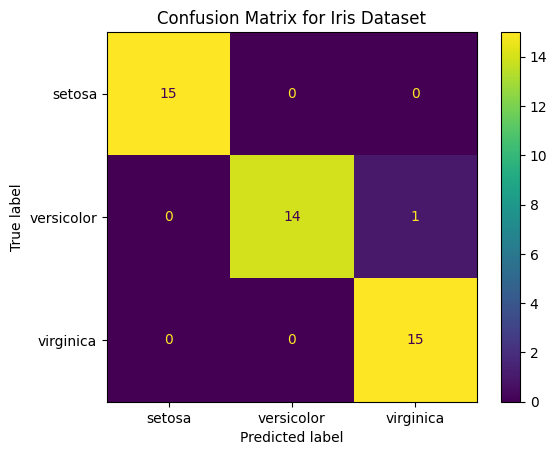

In [10]:
cm = confusion_matrix(iris_y_test, iris_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris['target_names'])

plt.style.use('default')
plt.figure(figsize=(10, 7))
disp.plot()
plt.title('Confusion Matrix for Iris Dataset')
plt.show()

### KFold Analysis

In [11]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'mcc': make_scorer(matthews_corrcoef)
}

iris_results = {}


#### Simple KFold

In [12]:
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
iris_results = {}

for k in range(2, 11):
	cv = KFold(n_splits=k, shuffle=False)
	scores = cross_validate(knn, iris_X_df, iris_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	iris_results[k] = mean_scores

iris_results_df = pd.DataFrame(iris_results)
display(iris_results_df)


,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.32,0.0,0.92,0.92,0.94,0.95,0.95,0.95,0.95
test_accuracy_max,0.33,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.11,0.0,0.99,0.99,1.00,0.99,0.99,1.00,1.00
test_precision_max,0.11,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.32,0.0,0.92,0.92,0.94,0.95,0.95,0.95,0.95
test_recall_max,0.33,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.16,0.0,0.95,0.95,0.97,0.97,0.97,0.97,0.98
test_f1_max,0.17,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,-0.06,0.0,0.45,0.37,0.00,0.27,0.23,0.22,0.20
test_mcc_max,0.00,0.0,0.90,1.00,0.00,1.00,1.00,1.00,1.00


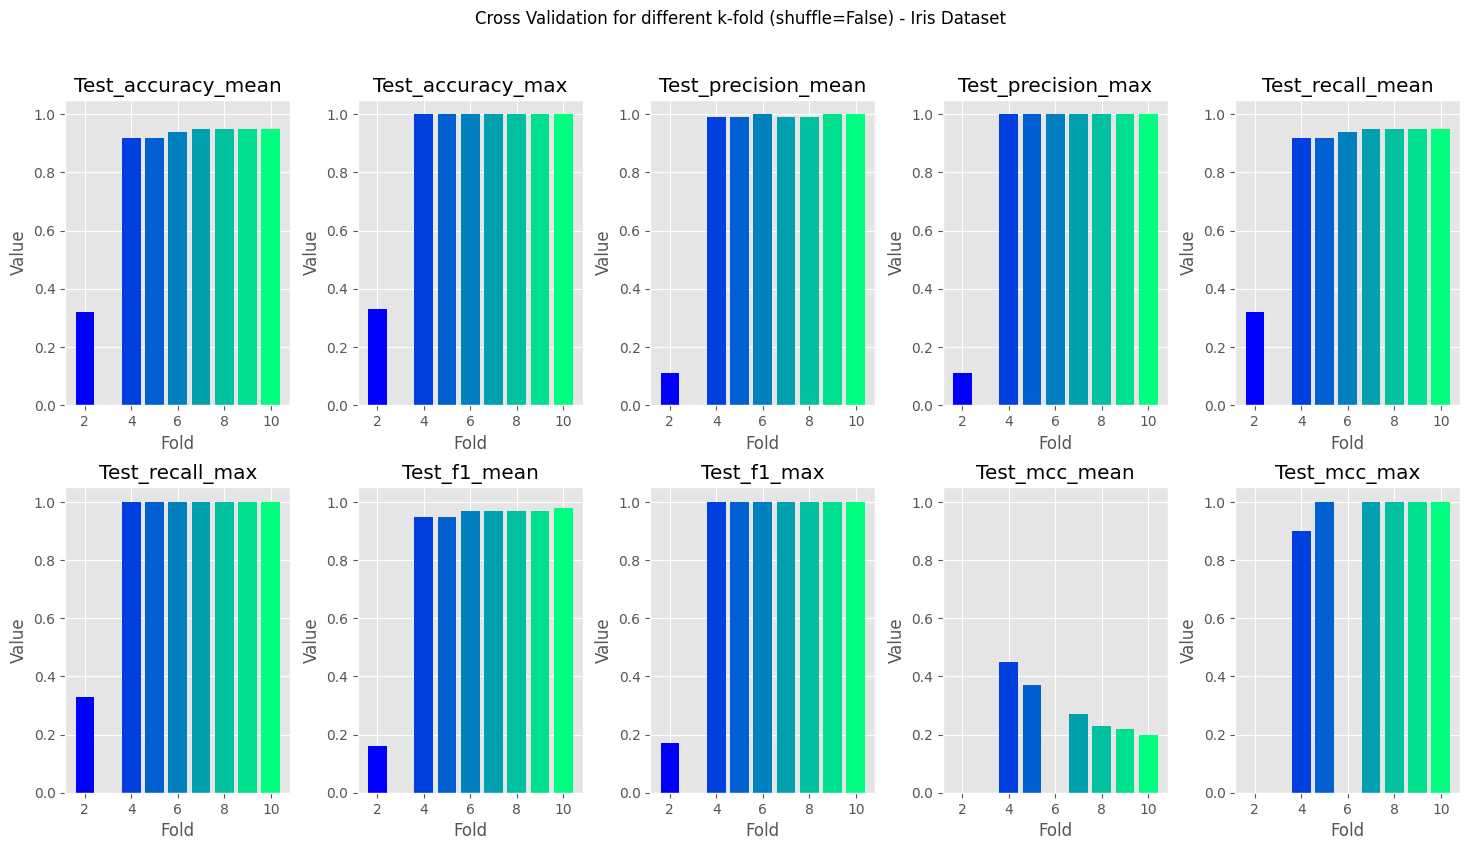

In [13]:
df = iris_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold (shuffle=False) - Iris Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### KFold - shuffle=True

In [14]:
import warnings

warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
iris_results = {}

for k in range(2, 11):
	cv = KFold(n_splits=k, shuffle=True, random_state=20)
	scores = cross_validate(knn, iris_X_df, iris_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	iris_results[k] = mean_scores

iris_results_df = pd.DataFrame(iris_results)
display(iris_results_df)


,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.95,0.96,0.96,0.97,0.95,0.96,0.96,0.95,0.96
test_accuracy_max,0.97,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.95,0.97,0.96,0.97,0.96,0.97,0.97,0.96,0.97
test_precision_max,0.97,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.95,0.96,0.96,0.97,0.95,0.96,0.96,0.95,0.96
test_recall_max,0.97,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.95,0.96,0.96,0.97,0.95,0.96,0.96,0.95,0.96
test_f1_max,0.97,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.93,0.94,0.94,0.95,0.93,0.94,0.94,0.93,0.94
test_mcc_max,0.96,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00


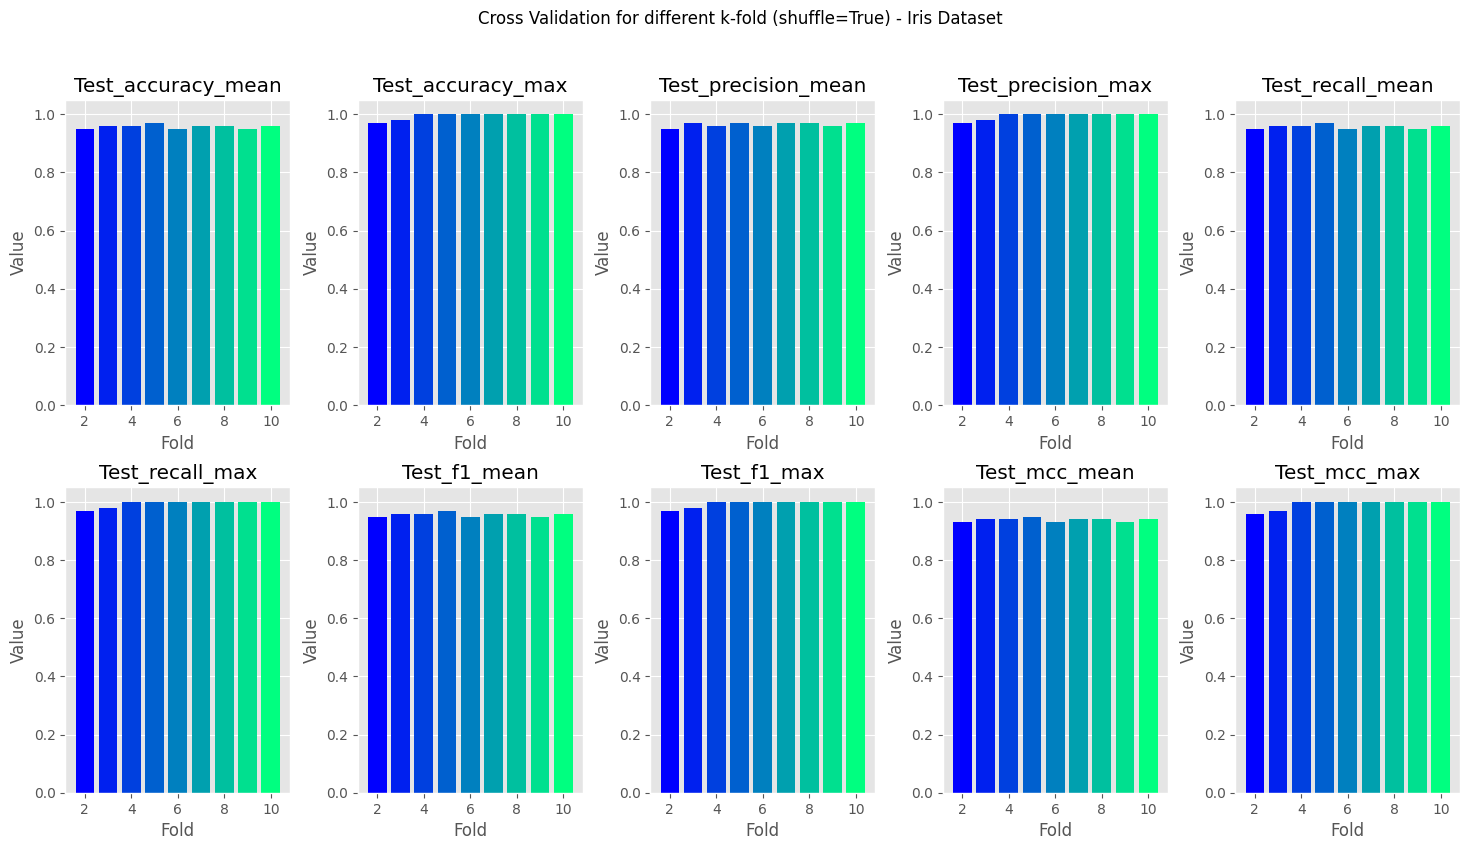

In [15]:
df = iris_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold (shuffle=True) - Iris Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Stratified KFold

In [16]:
knn = KNeighborsClassifier()
iris_results = {}

for k in range(2, 11):
	cv = StratifiedKFold(n_splits=k, shuffle=False)
	scores = cross_validate(knn, iris_X_df, iris_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	iris_results[k] = mean_scores

iris_results_df = pd.DataFrame(iris_results)
display(iris_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.95,0.97,0.95,0.96,0.95,0.95,0.95,0.95,0.95
test_accuracy_max,0.96,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.95,0.97,0.95,0.96,0.96,0.96,0.96,0.96,0.96
test_precision_max,0.96,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.95,0.97,0.95,0.96,0.95,0.95,0.95,0.95,0.95
test_recall_max,0.96,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.95,0.97,0.95,0.96,0.95,0.95,0.95,0.95,0.95
test_f1_max,0.96,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.93,0.95,0.93,0.94,0.93,0.93,0.93,0.93,0.93
test_mcc_max,0.94,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00


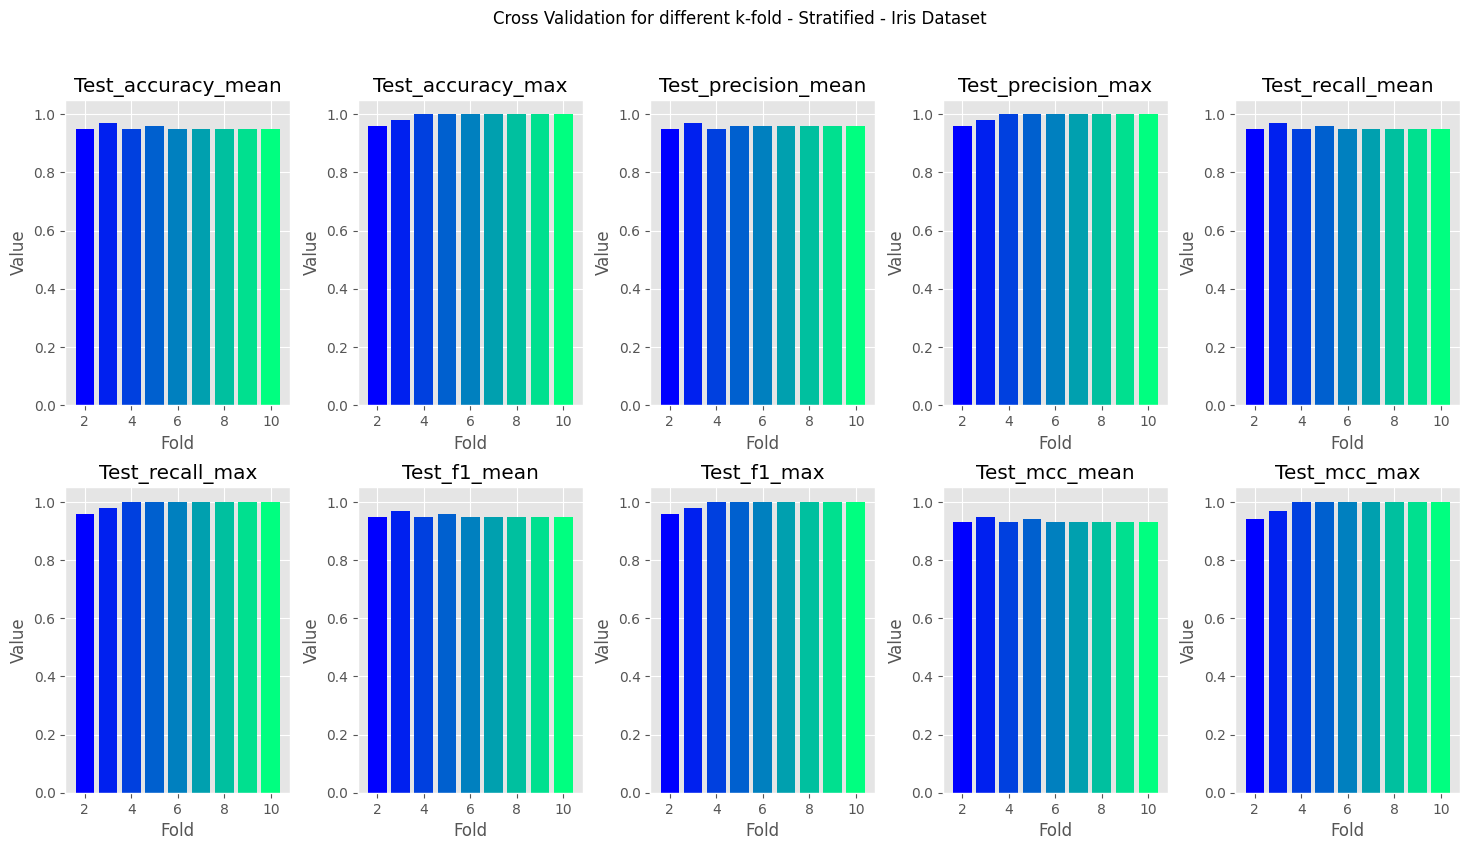

In [17]:
df = iris_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Stratified - Iris Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Repeated KFold

In [18]:
knn = KNeighborsClassifier()
iris_results = {}

for k in range(2, 11):
	cv = RepeatedKFold(n_splits=k, random_state=20, n_repeats=3)
	scores = cross_validate(knn, iris_X_df, iris_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	iris_results[k] = mean_scores

iris_results_df = pd.DataFrame(iris_results)
display(iris_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.96,0.95,0.96,0.96,0.95,0.96,0.96,0.95,0.96
test_accuracy_max,0.97,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_precision_max,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.96,0.95,0.96,0.96,0.95,0.96,0.96,0.95,0.96
test_recall_max,0.97,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.96,0.95,0.96,0.96,0.95,0.95,0.95,0.95,0.95
test_f1_max,0.97,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.94,0.93,0.94,0.94,0.93,0.93,0.93,0.93,0.93
test_mcc_max,0.96,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00


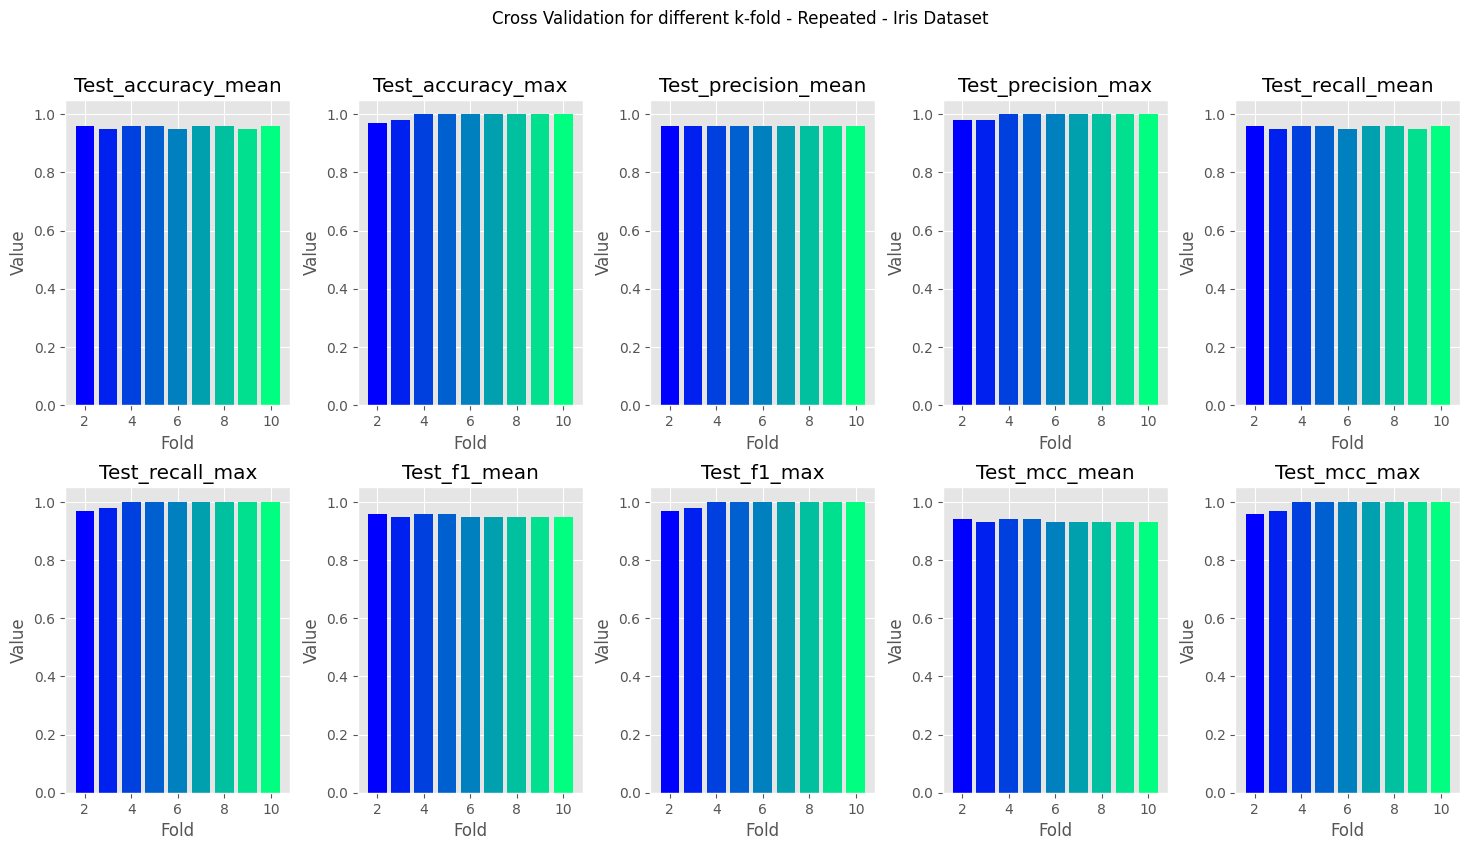

In [19]:
df = iris_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Repeated - Iris Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Repeated StratifiedKFold

In [20]:
knn = KNeighborsClassifier()
iris_results = {}

for k in range(2, 11):
	cv = RepeatedStratifiedKFold(n_splits=k, random_state=20, n_repeats=3)
	scores = cross_validate(knn, iris_X_df, iris_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	iris_results[k] = mean_scores

iris_results_df = pd.DataFrame(iris_results)
display(iris_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.96,0.95,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_accuracy_max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.96,0.95,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_precision_max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.96,0.95,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_recall_max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.96,0.95,0.96,0.96,0.96,0.96,0.96,0.95,0.95
test_f1_max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.93,0.93,0.94,0.94,0.94,0.93,0.94,0.94,0.94
test_mcc_max,0.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


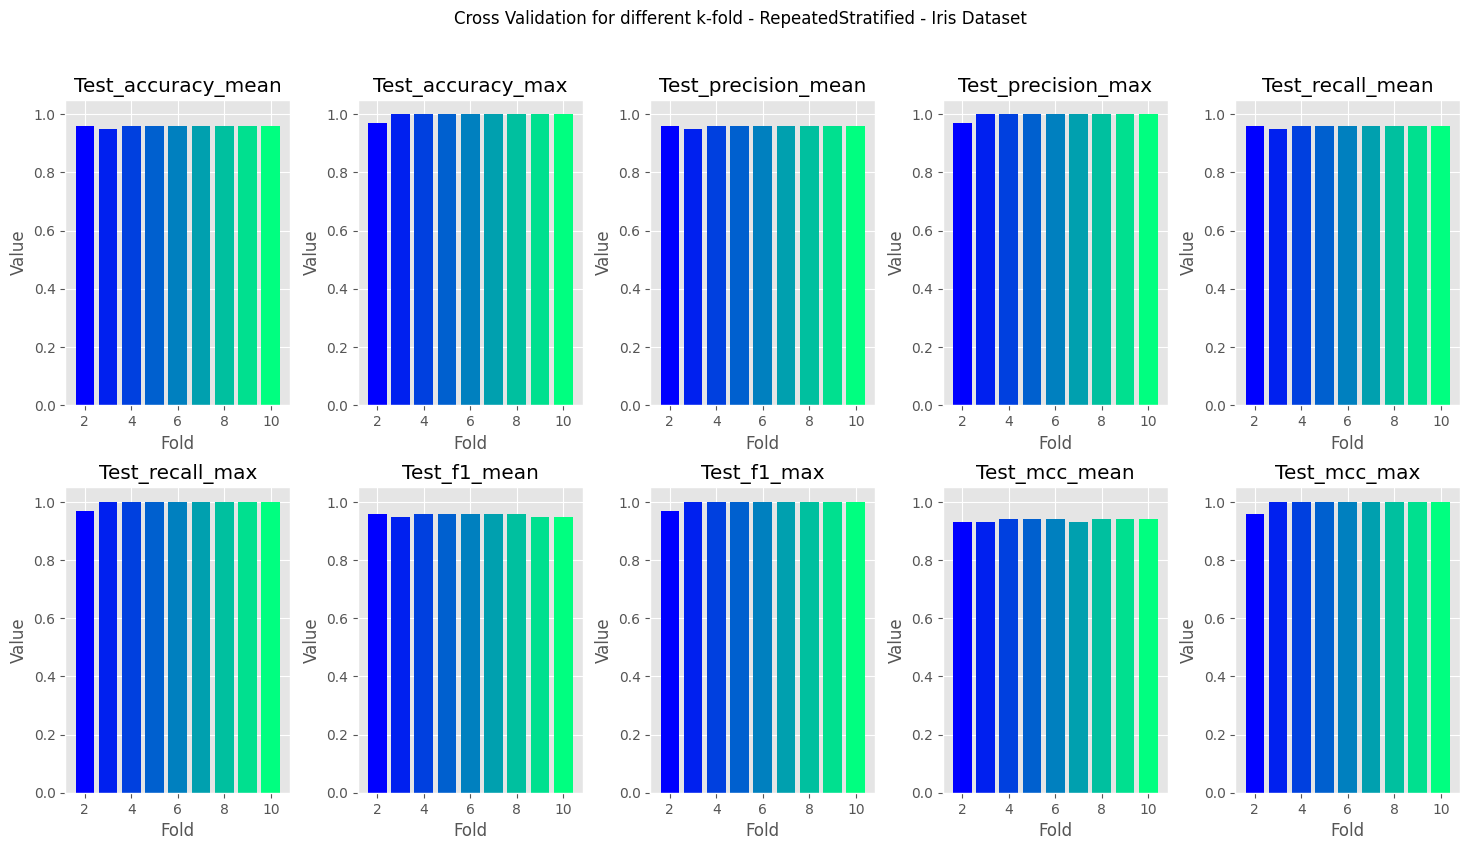

In [21]:
df = iris_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - RepeatedStratified - Iris Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

### KFolds Comparison

In [22]:
k = 3
cvs = [
       ("RepeatedStratifiedKFold", RepeatedStratifiedKFold(n_splits=k, random_state=20, n_repeats=3)),
       ("RepeatedKFold", RepeatedKFold(n_splits=k, random_state=20, n_repeats=3)),
       ("StratifiedKFold", StratifiedKFold(n_splits=k, shuffle=False)),
       ("KFold_shuffle", KFold(n_splits=k, shuffle=True, random_state=20)),
       ("KFold_simple", KFold(n_splits=k, shuffle=False)),
    ]

warnings.filterwarnings("ignore")

iris_results = {}
knn = KNeighborsClassifier()

for cv in cvs:
	scores = cross_validate(knn, iris_X_df, iris_y_df['species'], cv=cv[1], scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	iris_results[str(cv[0])] = mean_scores

iris_results_df = pd.DataFrame(iris_results)
display(iris_results_df)

,RepeatedStratifiedKFold,RepeatedKFold,StratifiedKFold,KFold_shuffle,KFold_simple
test_accuracy_mean,0.95,0.95,0.97,0.96,0.0
test_accuracy_max,1.00,0.98,0.98,0.98,0.0
test_precision_mean,0.95,0.96,0.97,0.97,0.0
test_precision_max,1.00,0.98,0.98,0.98,0.0
test_recall_mean,0.95,0.95,0.97,0.96,0.0
test_recall_max,1.00,0.98,0.98,0.98,0.0
test_f1_mean,0.95,0.95,0.97,0.96,0.0
test_f1_max,1.00,0.98,0.98,0.98,0.0
test_mcc_mean,0.93,0.93,0.95,0.94,0.0
test_mcc_max,1.00,0.97,0.97,0.97,0.0


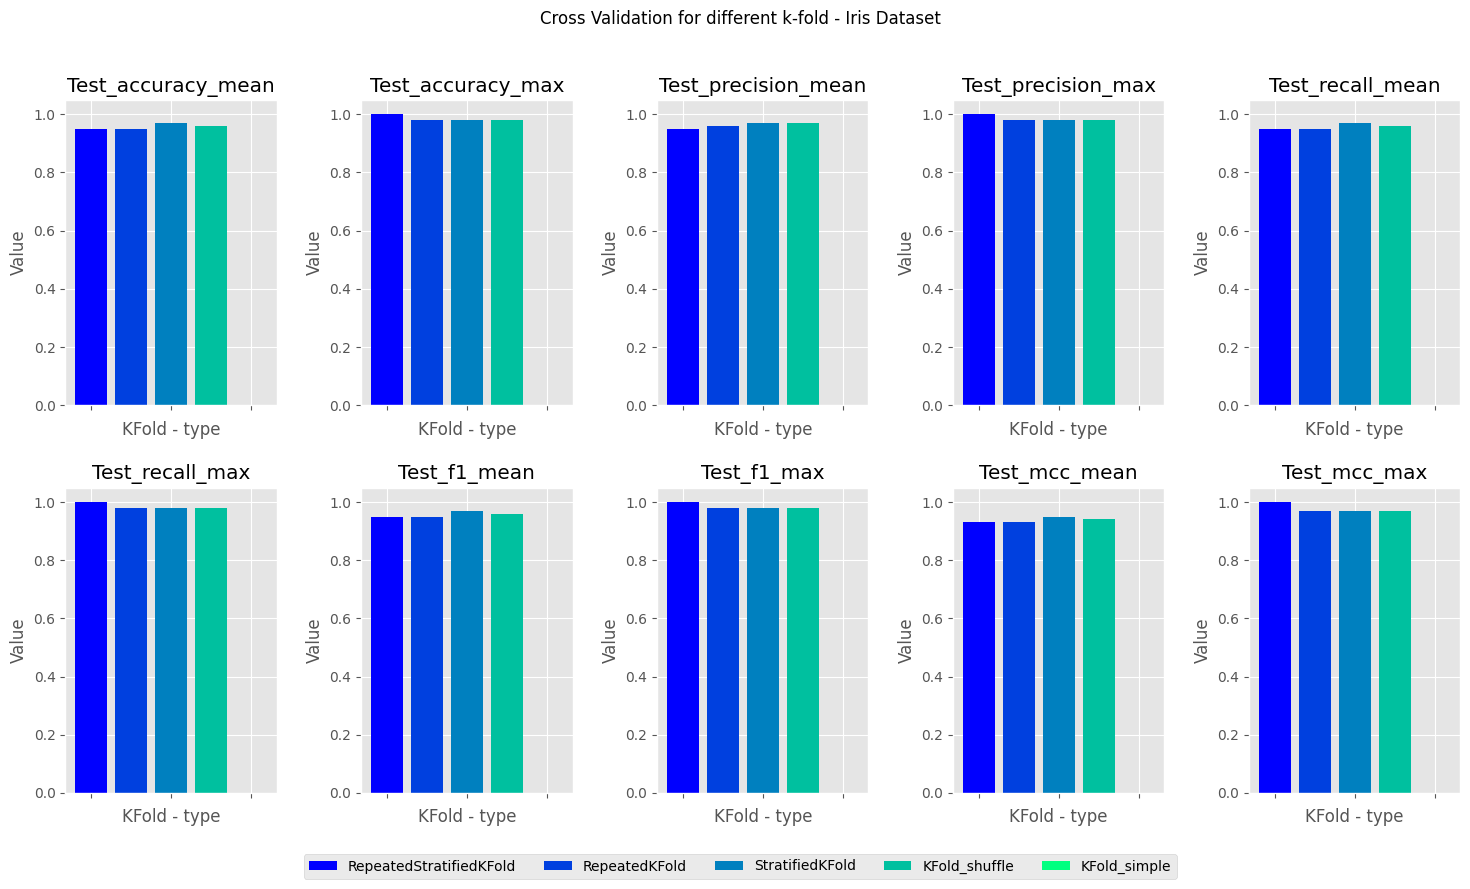

In [23]:
df = iris_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Iris Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(range(len(df.index)), colors):
        ax.bar(i, df[metric][i], color=color, label=f'{df.index[i]}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('KFold - type')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)
    ax.set_xticklabels([])

fig.subplots_adjust(hspace=0.27, wspace=0.4)

# Create a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(df.index))

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

### Grid Search

#### Different K in KNN

In [24]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

params = {'n_neighbors': range(1, 16)}

grid_search_n_neighbors = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_n_neighbors.fit(iris_X_df, iris_y_df['species'])

metrics = ['param_n_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df = pd.DataFrame(grid_search_n_neighbors.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)

display(cv_results_df)

,param_n_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
12,13,0.980000,0.981133,0.980000,0.979982,0.970571
13,14,0.973333,0.975499,0.973333,0.973275,0.961128
11,12,0.966667,0.970429,0.966667,0.966497,0.952021
5,6,0.966667,0.969922,0.966667,0.966584,0.951701
14,15,0.966667,0.968462,0.966667,0.966620,0.950935
4,5,0.966667,0.967753,0.966667,0.966637,0.950551
9,10,0.966667,0.967753,0.966667,0.966637,0.950551
10,11,0.966667,0.967753,0.966667,0.966637,0.950551
6,7,0.966667,0.967731,0.966667,0.966625,0.950539
7,8,0.960000,0.960694,0.960000,0.959970,0.940347


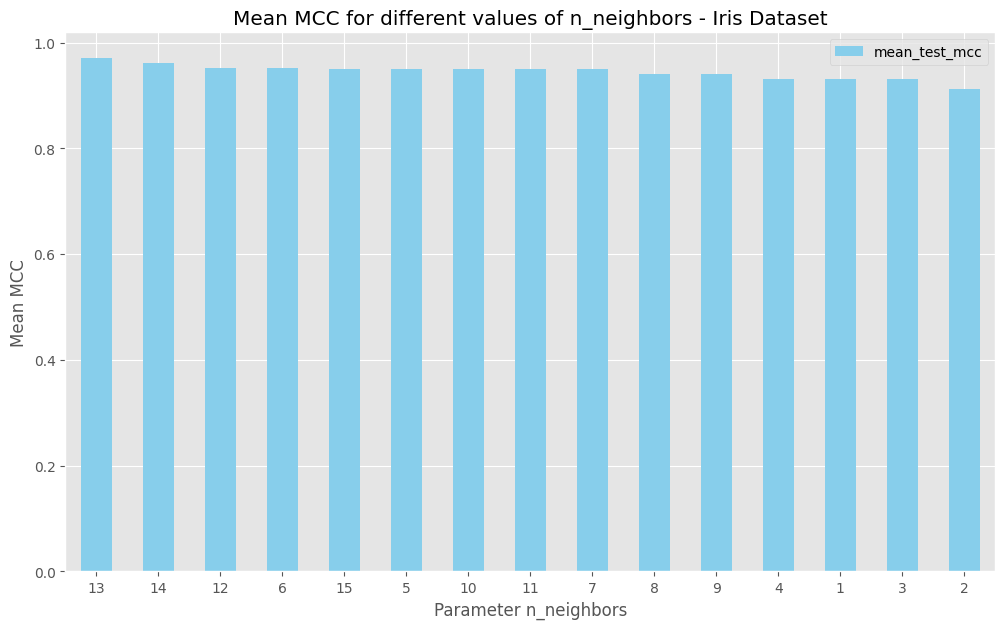

In [25]:
cv_results_df.plot(x='param_n_neighbors', y=['mean_test_mcc'], kind='bar', figsize=(12, 7), color='skyblue')
plt.title('Mean MCC for different values of n_neighbors - Iris Dataset')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Mean MCC')
plt.xticks(rotation=0)
plt.show()

#### Different weights

In [26]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

def custom_weights(distances):
    weights = np.exp(distances) / 2*distances
    return weights

params = {'weights': ['uniform', 'distance', custom_weights]}

grid_search_weights = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_weights.fit(iris_X_df, iris_y_df['species'])

metrics = ['param_weights', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_wg = pd.DataFrame(grid_search_weights.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)
cv_results_df_wg['param_weights'][2] = 'custom_weights'

display(cv_results_df_wg)

,param_weights,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
0,uniform,0.966667,0.967753,0.966667,0.966637,0.950551
2,custom_weights,0.966667,0.967753,0.966667,0.966637,0.950551
1,distance,0.960000,0.960694,0.960000,0.959970,0.940347


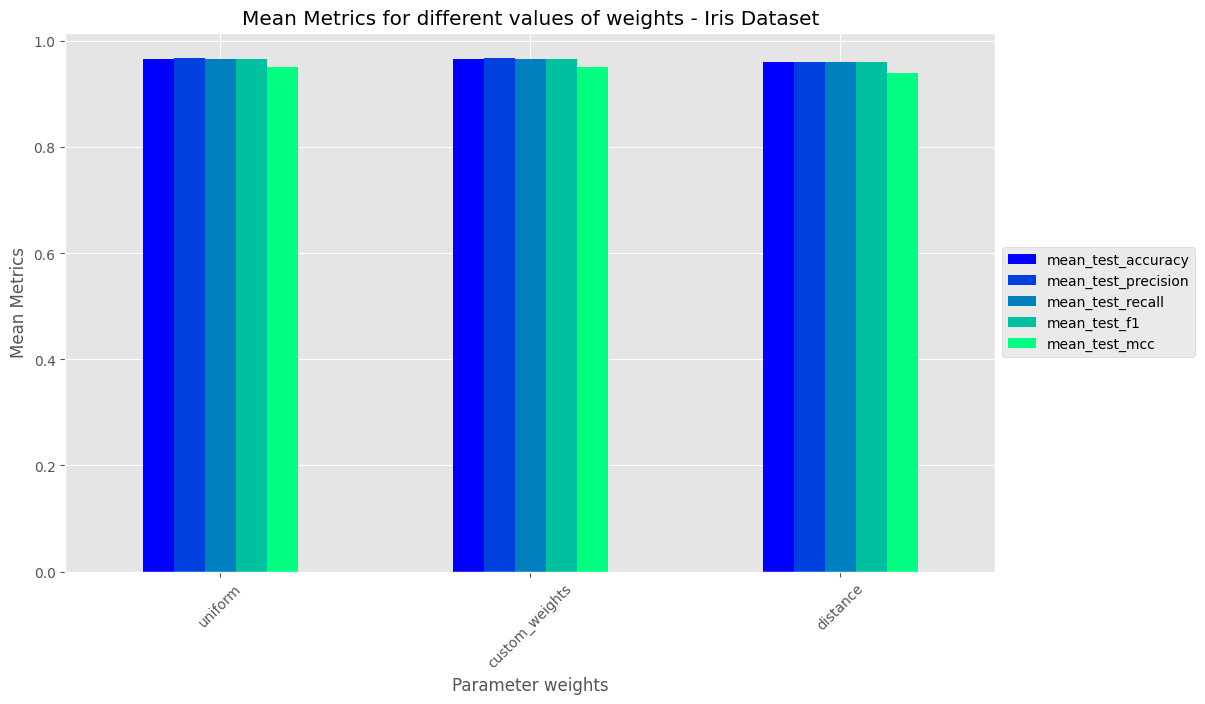

In [27]:
ax = cv_results_df_wg.plot(x='param_weights', y=metrics[1:], kind='bar', figsize=(12, 7), colormap='winter')
plt.title('Mean Metrics for different values of weights - Iris Dataset')
plt.xlabel('Parameter weights')
plt.ylabel('Mean Metrics')
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Different metrics

In [28]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

params = [{'metric': ['chebyshev', 'manhattan', 'euclidean', 'minkowski', 'canberra']},
          {'metric': ['mahalanobis'], 'metric_params': [{'VI': np.cov(iris_X_df, rowvar=False)}]}]

grid_search_metric = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_metric.fit(iris_X_df, iris_y_df['species'])

metrics = ['param_metric', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_metric = pd.DataFrame(grid_search_metric.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)

display(cv_results_df_metric)

,param_metric,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
5,mahalanobis,0.966667,0.968441,0.966667,0.966580,0.950901
2,euclidean,0.966667,0.967753,0.966667,0.966637,0.950551
3,minkowski,0.966667,0.967753,0.966667,0.966637,0.950551
1,manhattan,0.966667,0.967731,0.966667,0.966625,0.950539
0,chebyshev,0.960000,0.962176,0.960000,0.959946,0.941124
4,canberra,0.946667,0.948514,0.946667,0.946489,0.920999


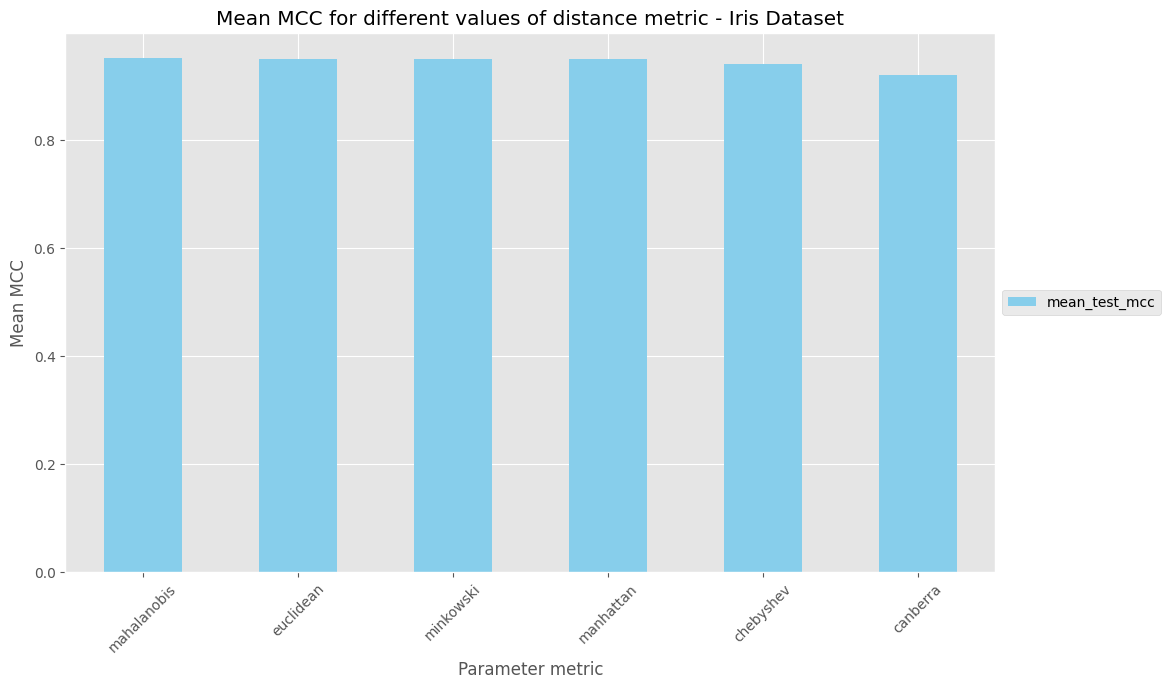

In [29]:
cv_results_df_metric.fillna(0, inplace=True)
ax = cv_results_df_metric.plot(x='param_metric', y=['mean_test_mcc'], kind='bar', figsize=(12, 7), color='skyblue')
plt.title('Mean MCC for different values of distance metric - Iris Dataset')
plt.xlabel('Parameter metric')
plt.ylabel('Mean MCC')
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### All three parameters

In [30]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

def custom_weights(distances):
    weights = np.exp(distances) / 2*distances
    return weights

params = [
    {'weights': ['uniform', 'distance', custom_weights], 'n_neighbors': range(1, 16),
     'metric': ['chebyshev', 'manhattan', 'euclidean', 'minkowski', 'canberra']},
    {'weights': ['uniform', 'distance', custom_weights], 'n_neighbors': range(1, 16),
     'metric': ['mahalanobis'], 'metric_params': [{'VI': np.cov(iris_X_df, rowvar=False)}]}
]

grid_search_all = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_all.fit(iris_X_df, iris_y_df['species'])

metrics = ['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_all = pd.DataFrame(grid_search_all.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False).head(10)

params_df = pd.json_normalize(cv_results_df_all['params'])
cv_results_df_all = pd.concat(
    					[params_df.reset_index(drop=True),
                		cv_results_df_all.drop('params', axis=1).reset_index(drop=True)],
                        axis=1
                    )

display(cv_results_df_all)

,metric,n_neighbors,weights,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
0,minkowski,13,uniform,0.980000,0.981133,0.980000,0.979982,0.970571
1,euclidean,13,uniform,0.980000,0.981133,0.980000,0.979982,0.970571
2,minkowski,14,uniform,0.973333,0.975499,0.973333,0.973275,0.961128
3,chebyshev,15,distance,0.973333,0.975499,0.973333,0.973275,0.961128
4,minkowski,14,distance,0.973333,0.975499,0.973333,0.973275,0.961128
5,euclidean,14,distance,0.973333,0.975499,0.973333,0.973275,0.961128
6,euclidean,14,uniform,0.973333,0.975499,0.973333,0.973275,0.961128
7,minkowski,14,<function custom_weights at 0x000001DC055F0C10>,0.973333,0.974096,0.973333,0.973328,0.960378
8,euclidean,14,<function custom_weights at 0x000001DC055F0C10>,0.973333,0.974096,0.973333,0.973328,0.960378
9,minkowski,13,<function custom_weights at 0x000001DC055F0C10>,0.973333,0.974096,0.973333,0.973328,0.960378


## Wine Dataset

### Simple Classification with KNN

In [31]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_df, wine_y_df['species'], test_size=0.3,
                                                                        random_state=20, stratify=wine_y_df['species'])

knn = KNeighborsClassifier()
knn.fit(wine_X_train, wine_y_train)
wine_y_pred = knn.predict(wine_X_test)

print(classification_report(wine_y_test, wine_y_pred))

index_wine = 'Wine dataset'

result_df_wine = pd.DataFrame({'Accuracy': pd.Series(round(accuracy_score(wine_y_test, wine_y_pred), 2), index=[index_wine]), 
						  'Precision': pd.Series(round(precision_score(wine_y_test, wine_y_pred, average='weighted'), 2), index=[index_wine]),
						  'Recall': pd.Series(round(recall_score(wine_y_test, wine_y_pred, average='weighted'), 2), index=[index_wine]),
						  'F1 Score': pd.Series(round(f1_score(wine_y_test, wine_y_pred, average='weighted'), 2), index=[index_wine]),
						  'MCC': pd.Series(round(matthews_corrcoef(wine_y_test, wine_y_pred), 2), index=[index_wine])})

display(result_df_wine)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.95      0.90      0.93        21
           2       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



,Accuracy,Precision,Recall,F1 Score,MCC
Wine dataset,0.94,0.95,0.94,0.94,0.92


<Figure size 1000x700 with 0 Axes>

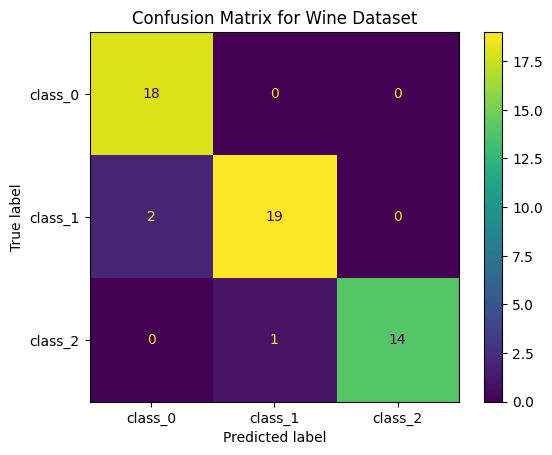

In [32]:
cm_wine = confusion_matrix(wine_y_test, wine_y_pred)
disp_wine = ConfusionMatrixDisplay(confusion_matrix=cm_wine, display_labels=wine['target_names'])

plt.style.use('default')
plt.figure(figsize=(10, 7))
disp_wine.plot()
plt.title('Confusion Matrix for Wine Dataset')
plt.show()

### KFold Analysis

In [33]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'mcc': make_scorer(matthews_corrcoef)
}

wine_results = {}


#### Simple KFold

In [34]:
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()

for k in range(2, 11):
	cv = KFold(n_splits=k, shuffle=False)
	scores = cross_validate(knn, wine_X_df, wine_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	wine_results[k] = mean_scores

wine_results_df = pd.DataFrame(wine_results)
display(wine_results_df)


,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.35,0.24,0.73,0.91,0.92,0.93,0.94,0.94,0.94
test_accuracy_max,0.40,0.54,0.87,0.97,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.15,0.34,0.98,0.98,0.99,0.99,1.00,0.99,0.99
test_precision_max,0.20,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.35,0.24,0.73,0.91,0.92,0.93,0.94,0.94,0.94
test_recall_max,0.40,0.54,0.87,0.97,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.21,0.25,0.81,0.94,0.95,0.95,0.97,0.96,0.96
test_f1_max,0.27,0.70,0.93,0.99,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,-0.11,-0.01,0.33,0.32,0.31,0.19,0.21,0.20,0.15
test_mcc_max,-0.07,0.00,0.70,0.83,1.00,0.68,0.91,1.00,0.86


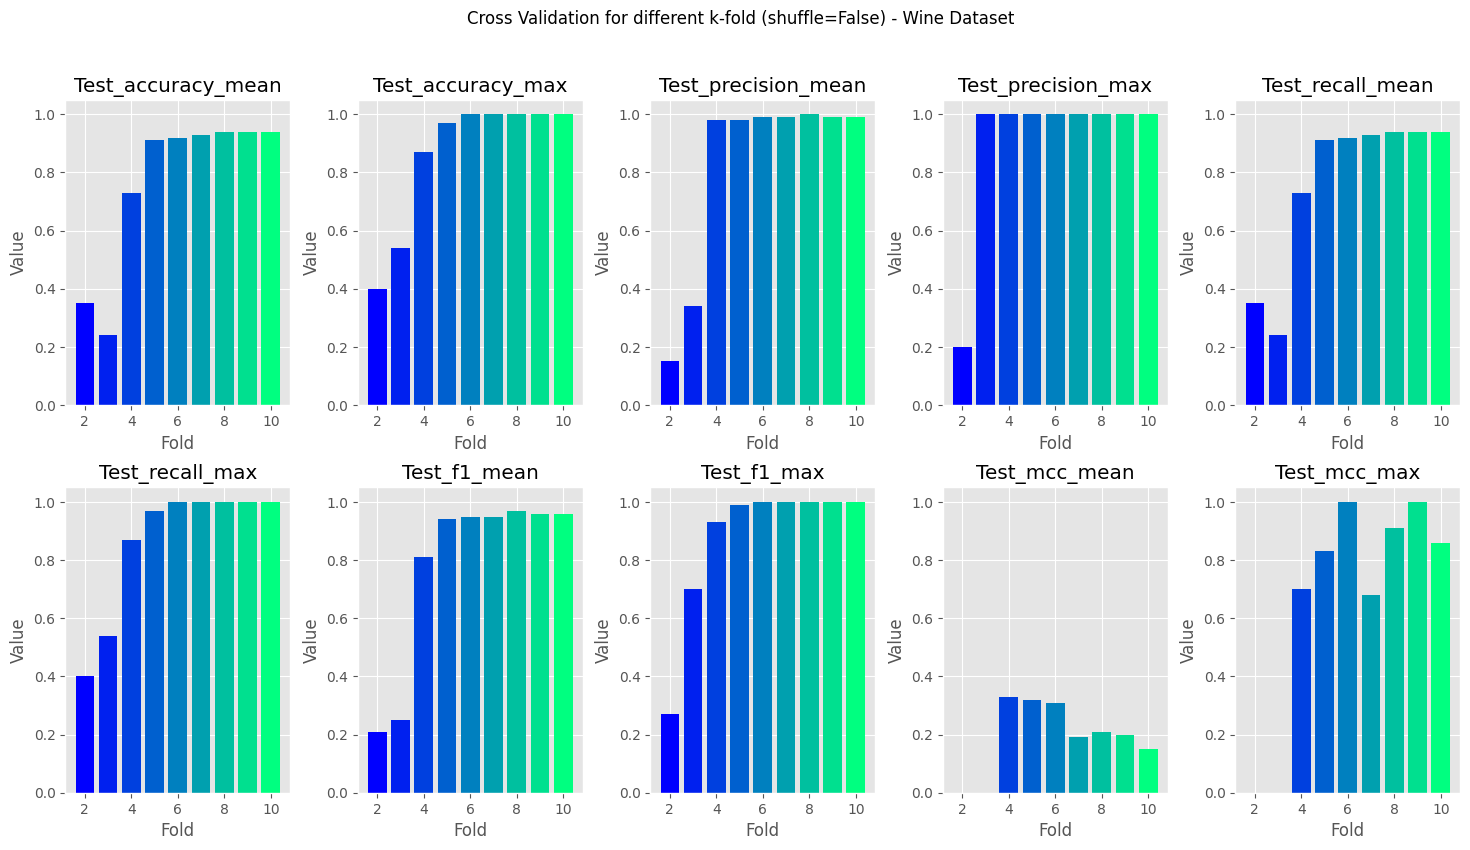

In [35]:
df = wine_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold (shuffle=False) - Wine Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### KFold - shuffle=True

In [36]:
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
wine_results = {}

for k in range(2, 11):
	cv = KFold(n_splits=k, shuffle=True, random_state=20)
	scores = cross_validate(knn, wine_X_df, wine_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	wine_results[k] = mean_scores

wine_results_df = pd.DataFrame(wine_results)
display(wine_results_df)


,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.96,0.94,0.95,0.95,0.95,0.95,0.96,0.95,0.95
test_accuracy_max,0.99,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.96,0.95,0.96,0.96,0.96,0.96,0.97,0.96,0.96
test_precision_max,0.99,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.96,0.94,0.95,0.95,0.95,0.95,0.96,0.95,0.95
test_recall_max,0.99,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.96,0.94,0.95,0.95,0.95,0.95,0.96,0.95,0.95
test_f1_max,0.99,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.94,0.91,0.93,0.93,0.92,0.92,0.94,0.92,0.93
test_mcc_max,0.98,0.97,0.97,1.00,1.00,1.00,1.00,1.00,1.00


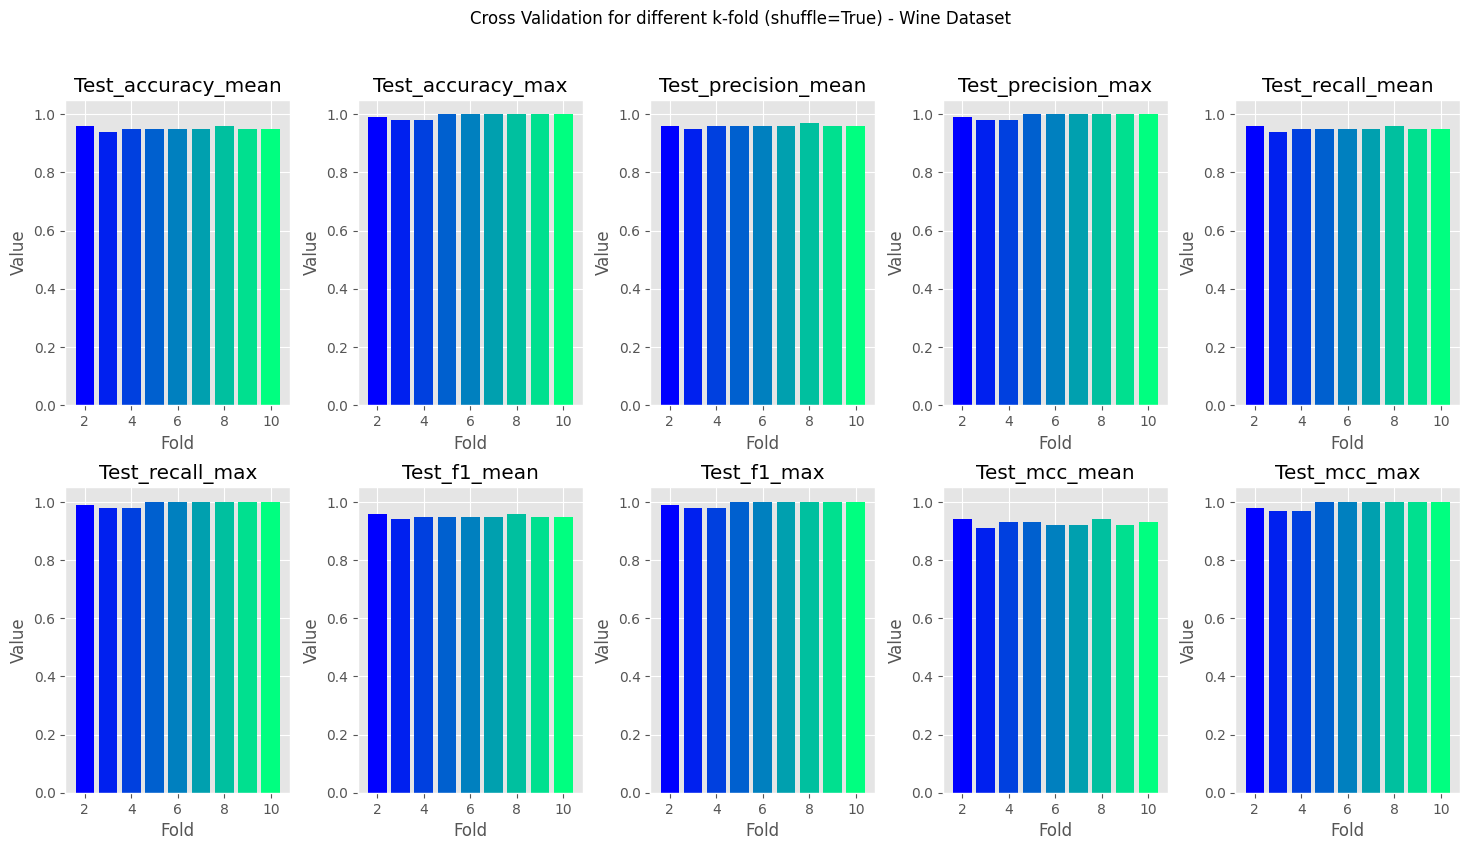

In [37]:
df = wine_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold (shuffle=True) - Wine Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Stratified KFold

In [38]:
knn = KNeighborsClassifier()
wine_results = {}

for k in range(2, 11):
	cv = StratifiedKFold(n_splits=k, shuffle=False)
	scores = cross_validate(knn, wine_X_df, wine_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	wine_results[k] = mean_scores

wine_results_df = pd.DataFrame(wine_results)
display(wine_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.93,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_accuracy_max,0.94,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.94,0.97,0.96,0.96,0.96,0.96,0.97,0.97,0.97
test_precision_max,0.95,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.93,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_recall_max,0.94,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.93,0.96,0.96,0.95,0.96,0.95,0.96,0.96,0.96
test_f1_max,0.94,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.90,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94
test_mcc_max,0.92,0.97,0.97,1.00,1.00,1.00,1.00,1.00,1.00


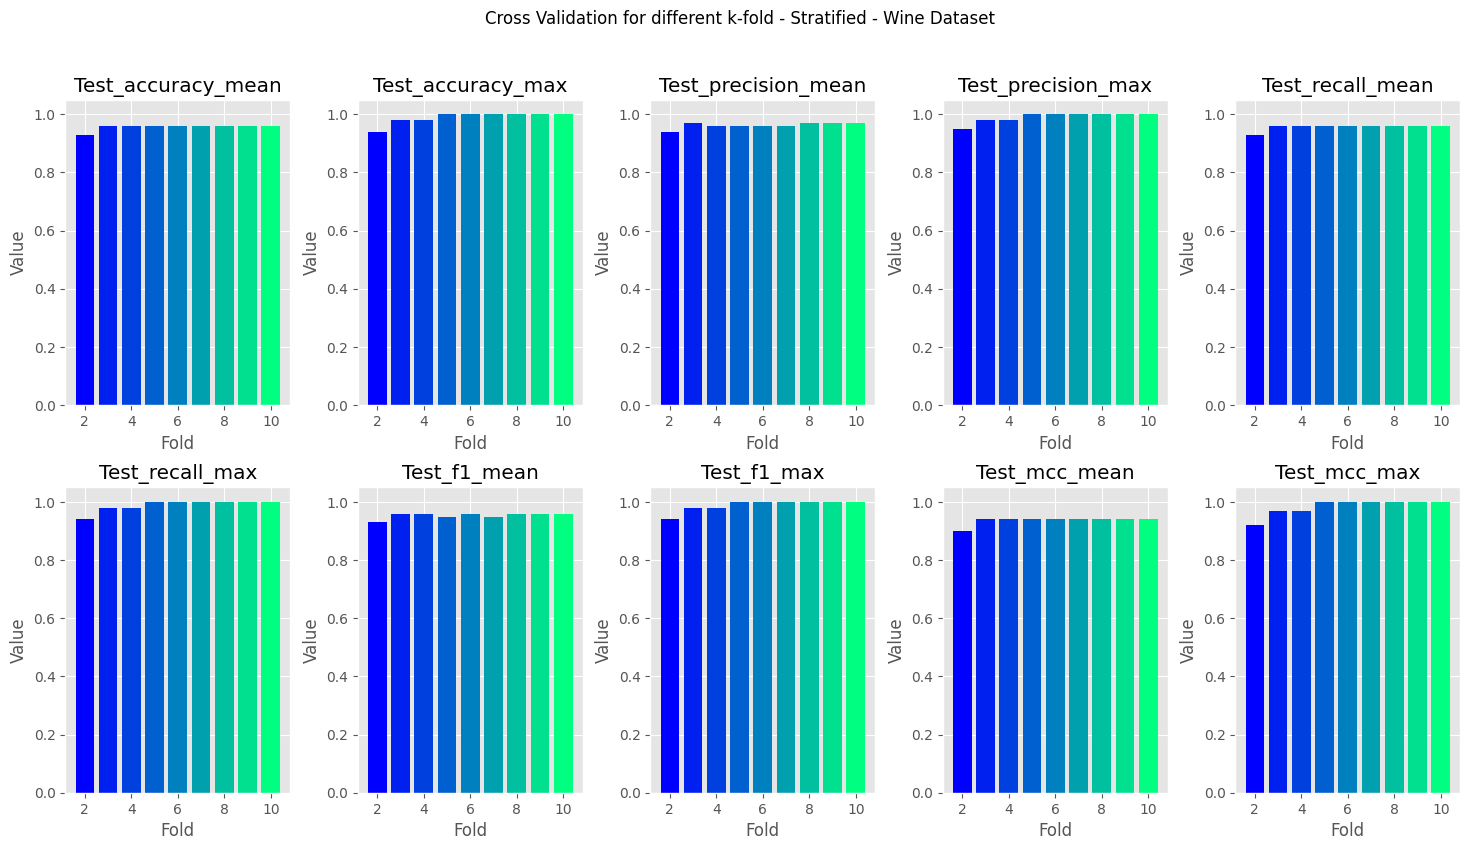

In [39]:
df = wine_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Stratified - Wine Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Repeated KFold

In [40]:
knn = KNeighborsClassifier()
wine_results = {}

for k in range(2, 11):
	cv = RepeatedKFold(n_splits=k, random_state=20, n_repeats=3)
	scores = cross_validate(knn, wine_X_df, wine_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	wine_results[k] = mean_scores

wine_results_df = pd.DataFrame(wine_results)
display(wine_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.95,0.94,0.95,0.95,0.95,0.95,0.95,0.95,0.95
test_accuracy_max,0.99,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.95,0.95,0.95,0.96,0.96,0.96,0.96,0.96,0.96
test_precision_max,0.99,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.95,0.94,0.95,0.95,0.95,0.95,0.95,0.95,0.95
test_recall_max,0.99,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.94,0.94,0.95,0.95,0.95,0.95,0.95,0.95,0.95
test_f1_max,0.99,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.92,0.91,0.93,0.93,0.92,0.93,0.93,0.93,0.93
test_mcc_max,0.98,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00


TypeError: FigureBase.subplots_adjust() got an unexpected keyword argument 'wsapce'

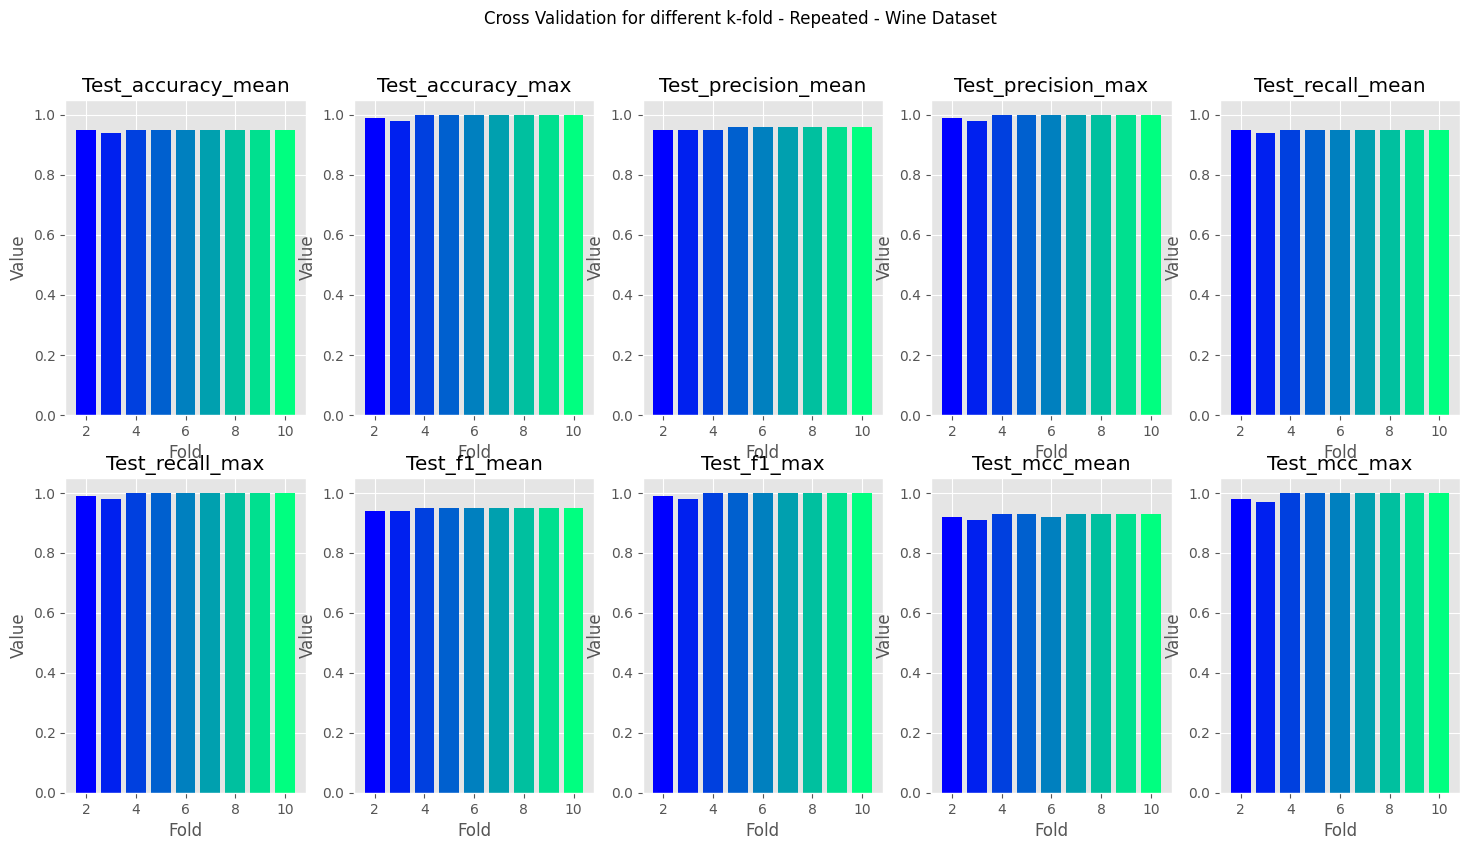

In [41]:
df = wine_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Repeated - Wine Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wsapce=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Repeated StratifiedKFold

In [ ]:
knn = KNeighborsClassifier()
wine_results = {}

for k in range(2, 11):
	cv = RepeatedStratifiedKFold(n_splits=k, random_state=20, n_repeats=3)
	scores = cross_validate(knn, wine_X_df, wine_y_df['species'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	wine_results[k] = mean_scores

wine_results_df = pd.DataFrame(wine_results)
display(wine_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_accuracy_max,0.98,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_precision_mean,0.96,0.96,0.96,0.97,0.97,0.96,0.97,0.97,0.97
test_precision_max,0.98,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_recall_max,0.98,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_f1_mean,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
test_f1_max,0.98,0.98,0.98,1.00,1.00,1.00,1.00,1.00,1.00
test_mcc_mean,0.94,0.94,0.94,0.95,0.94,0.94,0.95,0.94,0.94
test_mcc_max,0.97,0.98,0.97,1.00,1.00,1.00,1.00,1.00,1.00


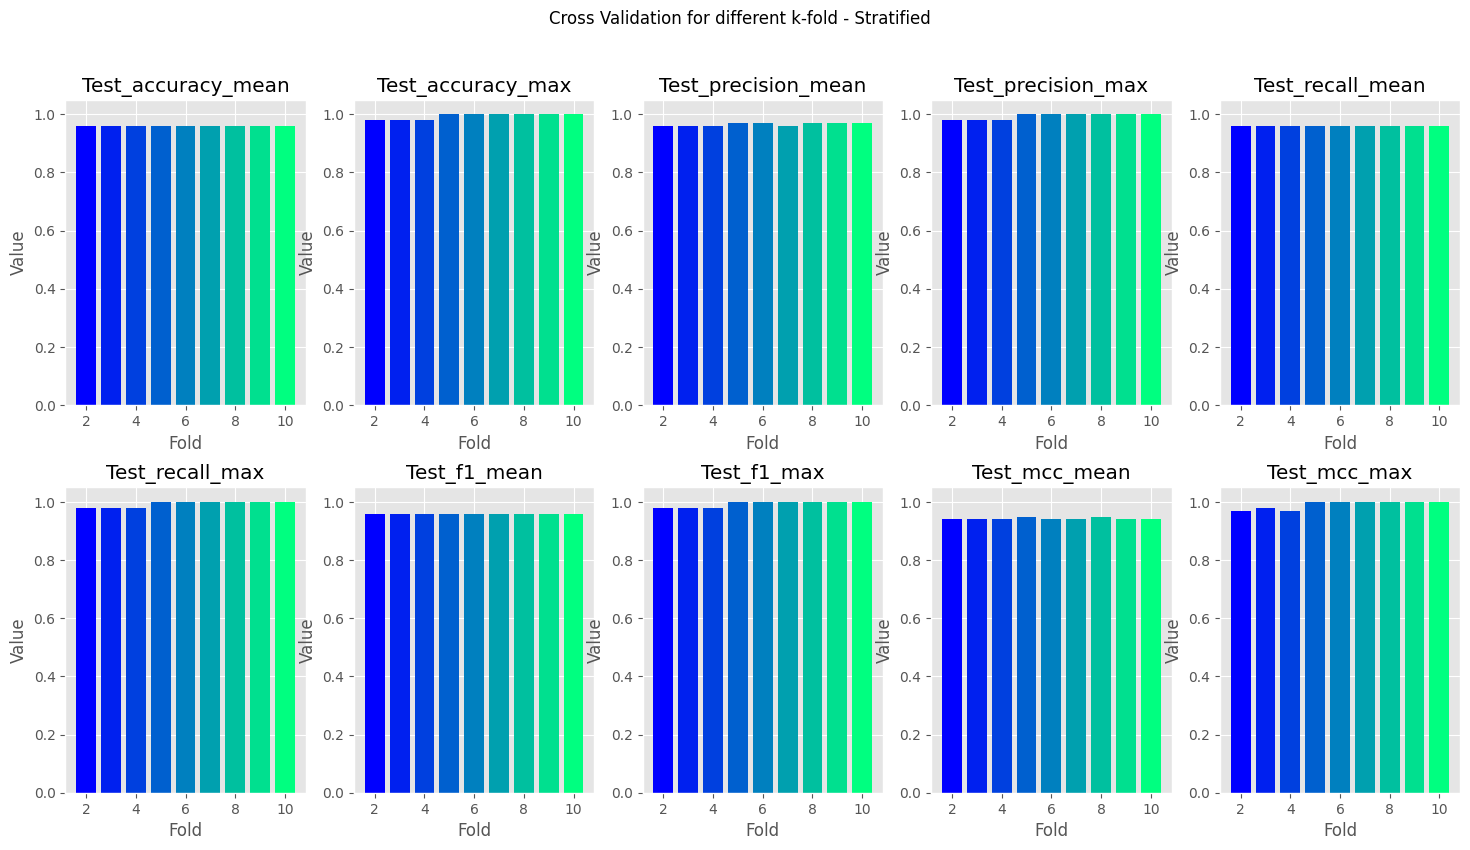

In [ ]:
df = wine_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - RepeatedStratified - Wine Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

### KFolds Comparison

In [ ]:
k = 3
cvs = [
       ("RepeatedStratifiedKFold", RepeatedStratifiedKFold(n_splits=k, random_state=20, n_repeats=3)),
       ("RepeatedKFold", RepeatedKFold(n_splits=k, random_state=20, n_repeats=3)),
       ("StratifiedKFold", StratifiedKFold(n_splits=k, shuffle=False)),
       ("KFold_shuffle", KFold(n_splits=k, shuffle=True, random_state=20)),
       ("KFold_simple", KFold(n_splits=k, shuffle=False)),
    ]

warnings.filterwarnings("ignore")

wine_results = {}
knn = KNeighborsClassifier()

for cv in cvs:
	scores = cross_validate(knn, wine_X_df, wine_y_df['species'], cv=cv[1], scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	wine_results[str(cv[0])] = mean_scores

wine_results_df = pd.DataFrame(wine_results)
display(wine_results_df)

,RepeatedStratifiedKFold,RepeatedKFold,StratifiedKFold,KFold_shuffle,KFold_simple
test_accuracy_mean,0.96,0.94,0.96,0.94,0.24
test_accuracy_max,0.98,0.98,0.98,0.98,0.54
test_precision_mean,0.96,0.95,0.97,0.95,0.34
test_precision_max,0.98,0.98,0.98,0.98,1.00
test_recall_mean,0.96,0.94,0.96,0.94,0.24
test_recall_max,0.98,0.98,0.98,0.98,0.54
test_f1_mean,0.96,0.94,0.96,0.94,0.25
test_f1_max,0.98,0.98,0.98,0.98,0.70
test_mcc_mean,0.94,0.91,0.94,0.91,-0.01
test_mcc_max,0.98,0.97,0.97,0.97,0.00


In [ ]:
df = wine_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Wine Dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(range(len(df.index)), colors):
        ax.bar(i, df[metric][i], color=color, label=f'{df.index[i]}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('KFold - type')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)
    ax.set_xticklabels([])

fig.subplots_adjust(hspace=0.27, wspace=0.4)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(df.index))

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

### Grid Search

#### Different K in KNN

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

params = {'n_neighbors': range(1, 16)}

grid_search_n_neighbors = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_n_neighbors.fit(wine_X_df, wine_y_df['species'])

metrics = ['param_n_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df = pd.DataFrame(grid_search_n_neighbors.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)

display(cv_results_df)

,param_n_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
14,15,0.971846,0.973326,0.971846,0.971664,0.958384
4,5,0.960829,0.966120,0.960829,0.960930,0.943570
11,12,0.955179,0.960099,0.955179,0.954989,0.935147
12,13,0.955179,0.960099,0.955179,0.954989,0.935147
13,14,0.955179,0.960099,0.955179,0.954989,0.935147
8,9,0.955179,0.958896,0.955179,0.954644,0.934820
10,11,0.955085,0.957112,0.955085,0.954688,0.933580
5,6,0.949623,0.956395,0.949623,0.949362,0.927886
2,3,0.949623,0.952874,0.949623,0.949267,0.925935
7,8,0.944068,0.951166,0.944068,0.943124,0.920308


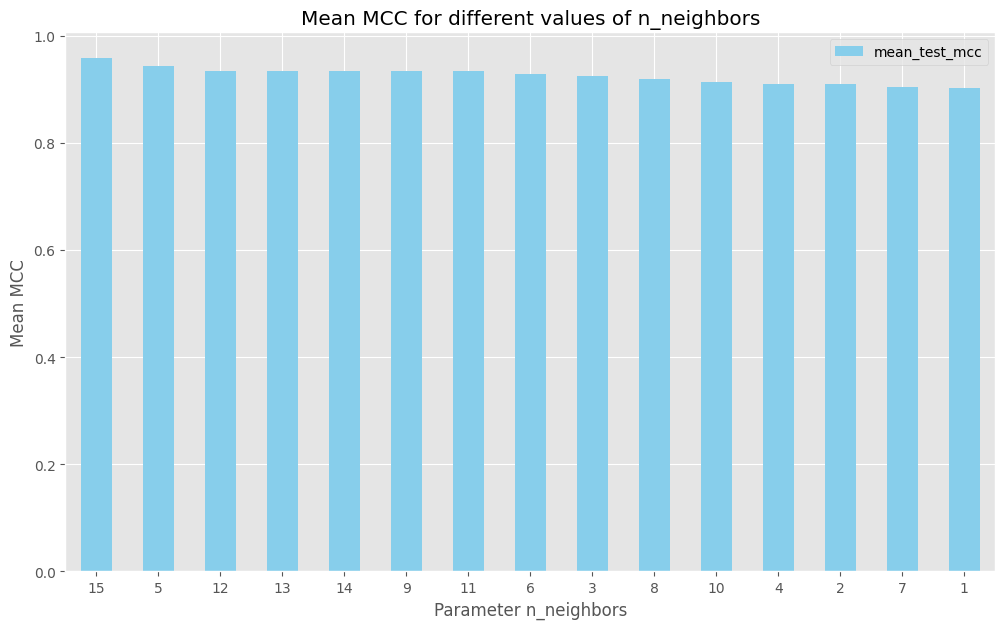

In [ ]:
cv_results_df.plot(x='param_n_neighbors', y=['mean_test_mcc'], kind='bar', figsize=(12, 7), color='skyblue')
plt.title('Mean MCC for different values of n_neighbors - Wine Dataset')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Mean MCC')
plt.xticks(rotation=0)
plt.show()

#### Different weights

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

def custom_weights(distances):
    weights = np.exp(distances) / 2*distances
    return weights

params = {'weights': ['uniform', 'distance', custom_weights]}

grid_search_weights = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_weights.fit(wine_X_df, wine_y_df['species'])

metrics = ['param_weights', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_wg = pd.DataFrame(grid_search_weights.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)
cv_results_df_wg['param_weights'][2] = 'custom_weights'

display(cv_results_df_wg)

,param_weights,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
0,uniform,0.960829,0.966120,0.960829,0.960930,0.943570
2,custom_weights,0.960829,0.966120,0.960829,0.960930,0.943570
1,distance,0.955273,0.960891,0.955273,0.954853,0.935878


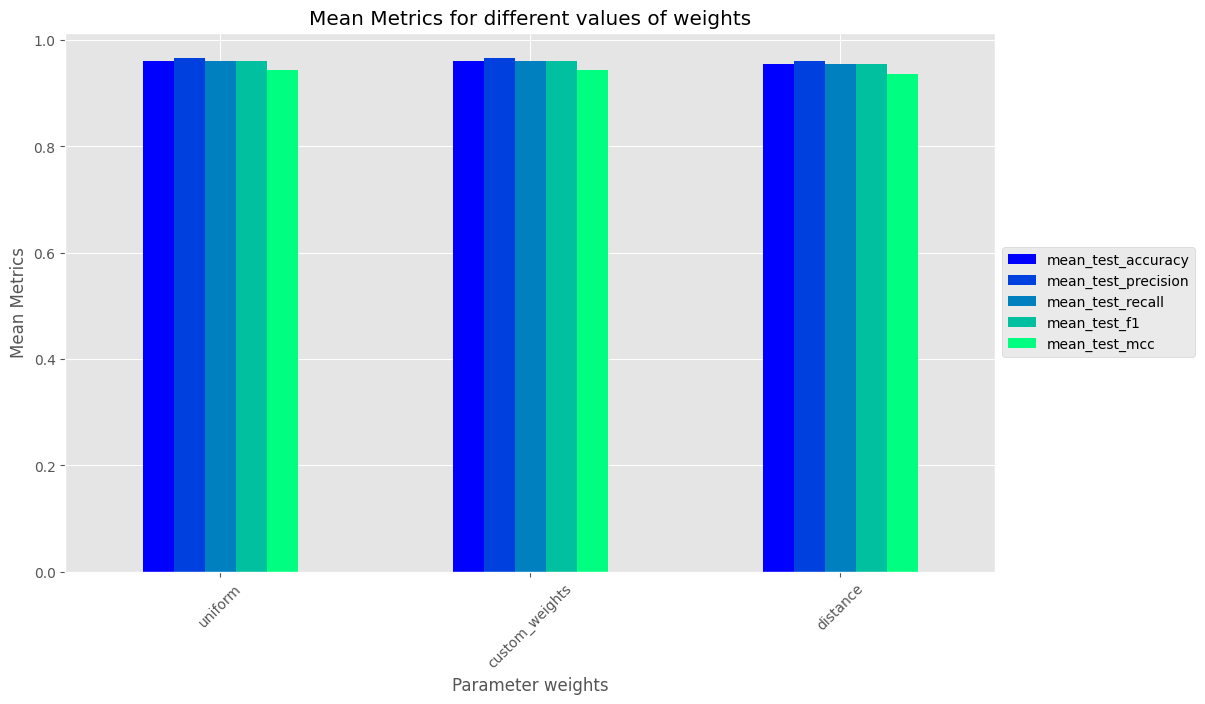

In [ ]:
ax = cv_results_df_wg.plot(x='param_weights', y=metrics[1:], kind='bar', figsize=(12, 7), colormap='winter')
plt.title('Mean Metrics for different values of weights - Wine Dataset')
plt.xlabel('Parameter weights')
plt.ylabel('Mean Metrics')
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Different metrics

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

params = [{'metric': ['chebyshev', 'manhattan', 'euclidean', 'minkowski', 'canberra']},
          {'metric': ['mahalanobis'], 'metric_params': [{'VI': np.cov(wine_X_df, rowvar=False)}]}]

grid_search_metric = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_metric.fit(wine_X_df, wine_y_df['species'])

metrics = ['param_metric', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_metric = pd.DataFrame(grid_search_metric.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)

display(cv_results_df_metric)

,param_metric,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
2,euclidean,0.960829,0.966120,0.960829,0.960930,0.943570
3,minkowski,0.960829,0.966120,0.960829,0.960930,0.943570
1,manhattan,0.955273,0.962237,0.955273,0.955261,0.936247
5,canberra,0.932957,0.948299,0.932957,0.932294,0.907857
0,chebyshev,0.910169,0.922547,0.910169,0.908752,0.872496
4,mahalanobis,NaN,NaN,NaN,NaN,NaN


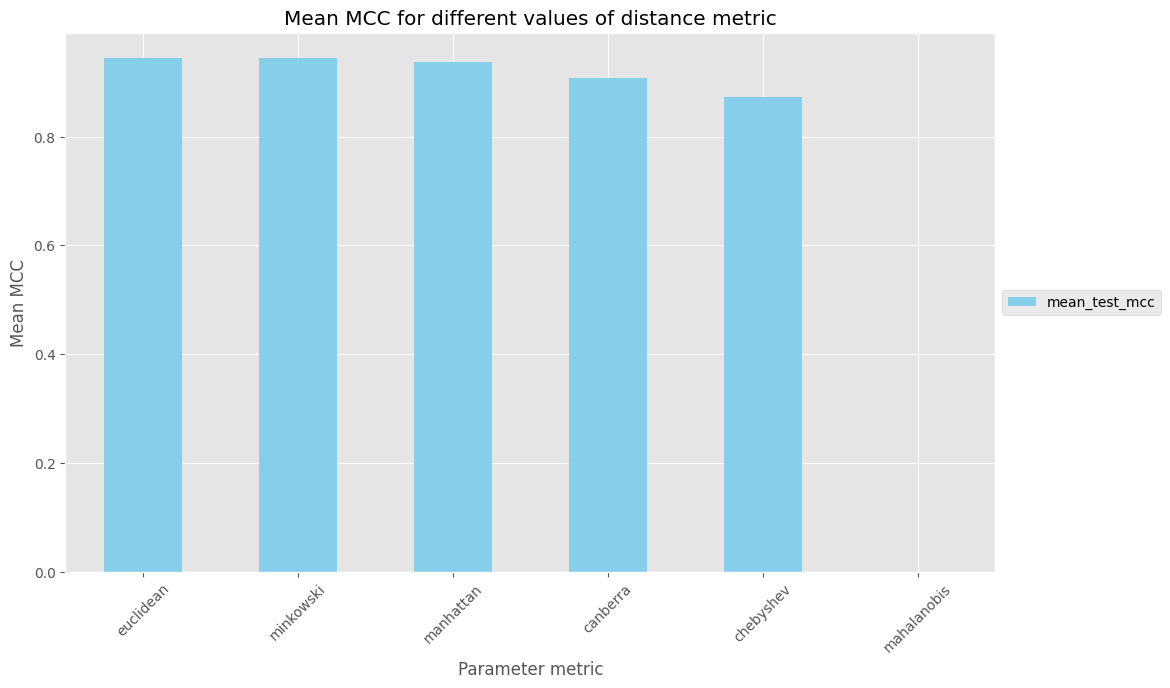

In [ ]:
cv_results_df_metric.fillna(0, inplace=True)
ax = cv_results_df_metric.plot(x='param_metric', y=['mean_test_mcc'], kind='bar', figsize=(12, 7), color='skyblue')
plt.title('Mean MCC for different values of distance metric - Wine Dataset')
plt.xlabel('Parameter metric')
plt.ylabel('Mean MCC')
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### All three parameters

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

def custom_weights(distances):
    weights = np.exp(distances) / 2*distances
    return weights

params = [
    {'weights': ['uniform', 'distance', custom_weights], 'n_neighbors': range(1, 16),
     'metric': ['chebyshev', 'manhattan', 'euclidean', 'minkowski', 'canberra']},
    {'weights': ['uniform', 'distance', custom_weights], 'n_neighbors': range(1, 16),
     'metric': ['mahalanobis'], 'metric_params': [{'VI': np.cov(wine_X_df, rowvar=False)}]}
]

grid_search_all = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_all.fit(wine_X_df, wine_y_df['species'])

metrics = ['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_all = pd.DataFrame(grid_search_all.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False).head(10)

params_df = pd.json_normalize(cv_results_df_all['params'])
cv_results_df_all = pd.concat(
    					[params_df.reset_index(drop=True),
                		cv_results_df_all.drop('params', axis=1).reset_index(drop=True)],
                        axis=1
                    )

display(cv_results_df_all)

,metric,n_neighbors,weights,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
0,manhattan,10,<function custom_weights at 0x000001EC7D869C60>,0.972034,0.974540,0.972034,0.972073,0.958996
1,minkowski,15,uniform,0.971846,0.973326,0.971846,0.971664,0.958384
2,minkowski,15,<function custom_weights at 0x000001EC7D869C60>,0.971846,0.973326,0.971846,0.971664,0.958384
3,euclidean,15,<function custom_weights at 0x000001EC7D869C60>,0.971846,0.973326,0.971846,0.971664,0.958384
4,euclidean,15,uniform,0.971846,0.973326,0.971846,0.971664,0.958384
5,minkowski,15,distance,0.971846,0.973326,0.971846,0.971664,0.958384
6,euclidean,15,distance,0.971846,0.973326,0.971846,0.971664,0.958384
7,manhattan,9,<function custom_weights at 0x000001EC7D869C60>,0.966478,0.969311,0.966478,0.966147,0.951178
8,manhattan,7,<function custom_weights at 0x000001EC7D869C60>,0.961017,0.967232,0.961017,0.960286,0.945232
9,manhattan,5,<function custom_weights at 0x000001EC7D869C60>,0.960923,0.967093,0.960923,0.960886,0.944376


## Glass Dataset

### Simple Classification with KNN

In [ ]:
glass_X_train, glass_X_test, glass_y_train, glass_y_test = train_test_split(glass_X_df, glass_y_df['Type_of_glass'], test_size=0.3,
                                                                        random_state=20, stratify=glass_y_df['Type_of_glass'])

knn = KNeighborsClassifier()
knn.fit(glass_X_train, glass_y_train)
glass_y_pred = knn.predict(glass_X_test)

print(classification_report(glass_y_test, glass_y_pred))

index_glass = 'Glass dataset'

result_df_glass = pd.DataFrame({'Accuracy': pd.Series(round(accuracy_score(glass_y_test, glass_y_pred), 2), index=[index_glass]), 
						  'Precision': pd.Series(round(precision_score(glass_y_test, glass_y_pred, average='weighted'), 2), index=[index_glass]),
						  'Recall': pd.Series(round(recall_score(glass_y_test, glass_y_pred, average='weighted'), 2), index=[index_glass]),
						  'F1 Score': pd.Series(round(f1_score(glass_y_test, glass_y_pred, average='weighted'), 2), index=[index_glass]),
						  'MCC': pd.Series(round(matthews_corrcoef(glass_y_test, glass_y_pred), 2), index=[index_glass])})

display(result_df_glass)


              precision    recall  f1-score   support

           1       0.61      0.81      0.69        21
           2       0.67      0.61      0.64        23
           3       1.00      0.20      0.33         5
           5       0.29      0.50      0.36         4
           6       0.00      0.00      0.00         3
           7       0.75      0.67      0.71         9

    accuracy                           0.62        65
   macro avg       0.55      0.46      0.46        65
weighted avg       0.63      0.62      0.60        65



,Accuracy,Precision,Recall,F1 Score,MCC
Glass dataset,0.62,0.63,0.62,0.6,0.47


<Figure size 1000x700 with 0 Axes>

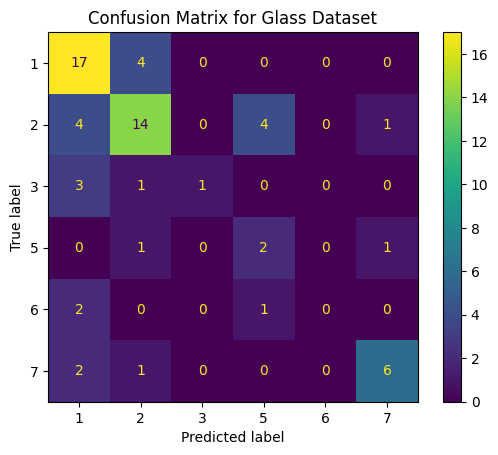

In [ ]:
cm_glass = confusion_matrix(glass_y_test, glass_y_pred)
disp_glass = ConfusionMatrixDisplay(confusion_matrix=cm_glass, display_labels=glass_y_df['Type_of_glass'].unique())

plt.style.use('default')
plt.figure(figsize=(10, 7))
disp_glass.plot()
plt.title('Confusion Matrix for Glass Dataset')
plt.show()

### KFold Analysis

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'mcc': make_scorer(matthews_corrcoef)
}

glass_results = {}


#### Simple KFold

In [ ]:
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()

for k in range(2, 11):
	cv = KFold(n_splits=k, shuffle=False)
	scores = cross_validate(knn, glass_X_df, glass_y_df['Type_of_glass'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	glass_results[k] = mean_scores

glass_results_df = pd.DataFrame(glass_results)
display(glass_results_df)


,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.21,0.02,0.27,0.32,0.34,0.41,0.41,0.43,0.52
test_accuracy_max,0.28,0.03,0.65,0.74,0.64,0.81,0.93,0.83,0.91
test_precision_mean,0.12,0.00,0.60,0.60,0.67,0.64,0.65,0.80,0.78
test_precision_max,0.14,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test_recall_mean,0.21,0.02,0.27,0.32,0.34,0.41,0.41,0.43,0.52
test_recall_max,0.28,0.03,0.65,0.74,0.64,0.81,0.93,0.83,0.91
test_f1_mean,0.15,0.00,0.34,0.37,0.44,0.48,0.48,0.51,0.61
test_f1_max,0.18,0.00,0.67,0.75,0.78,0.87,0.93,0.91,0.95
test_mcc_mean,0.02,0.01,0.12,0.12,0.06,0.12,0.13,0.05,0.08
test_mcc_max,0.08,0.04,0.44,0.52,0.28,0.65,0.86,0.43,0.62


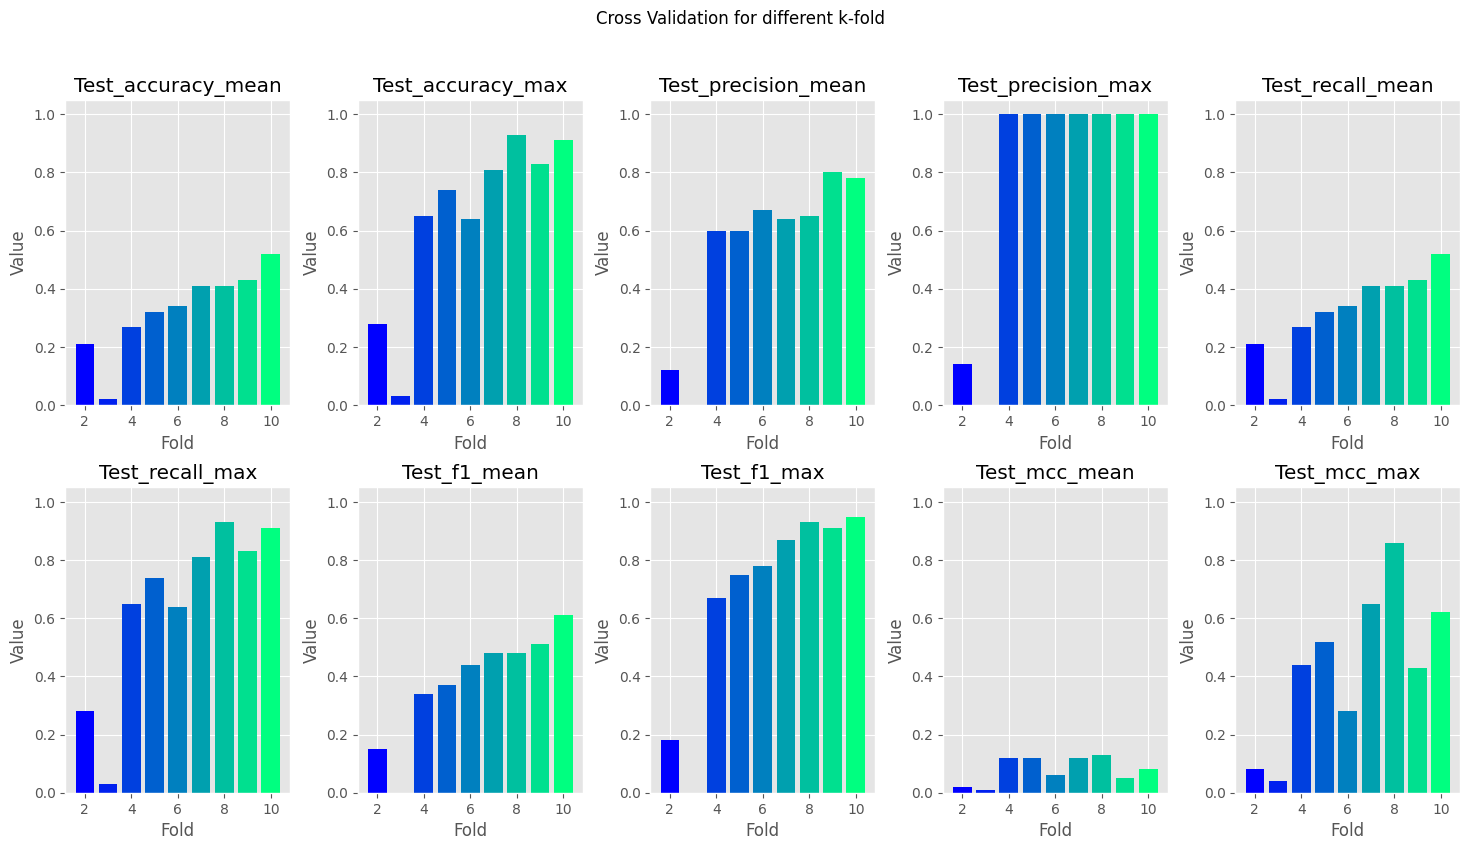

In [ ]:
df = glass_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold (shuffle=False) - Glass dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### KFold - shuffle=True

In [ ]:
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
glass_results = {}

for k in range(2, 11):
	cv = KFold(n_splits=k, shuffle=True, random_state=20)
	scores = cross_validate(knn, glass_X_df, glass_y_df['Type_of_glass'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	glass_results[k] = mean_scores

glass_results_df = pd.DataFrame(glass_results)
display(glass_results_df)


,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.61,0.65,0.63,0.62,0.65,0.64,0.66,0.67,0.66
test_accuracy_max,0.62,0.75,0.65,0.79,0.75,0.81,0.81,0.88,0.86
test_precision_mean,0.59,0.65,0.62,0.62,0.64,0.62,0.64,0.66,0.65
test_precision_max,0.61,0.73,0.71,0.80,0.74,0.76,0.75,0.84,0.86
test_recall_mean,0.61,0.65,0.63,0.62,0.65,0.64,0.66,0.67,0.66
test_recall_max,0.62,0.75,0.65,0.79,0.75,0.81,0.81,0.88,0.86
test_f1_mean,0.59,0.63,0.60,0.60,0.62,0.61,0.63,0.64,0.63
test_f1_max,0.59,0.73,0.64,0.79,0.74,0.78,0.78,0.86,0.86
test_mcc_mean,0.46,0.53,0.50,0.48,0.51,0.50,0.53,0.53,0.53
test_mcc_max,0.48,0.62,0.51,0.70,0.63,0.71,0.73,0.81,0.78


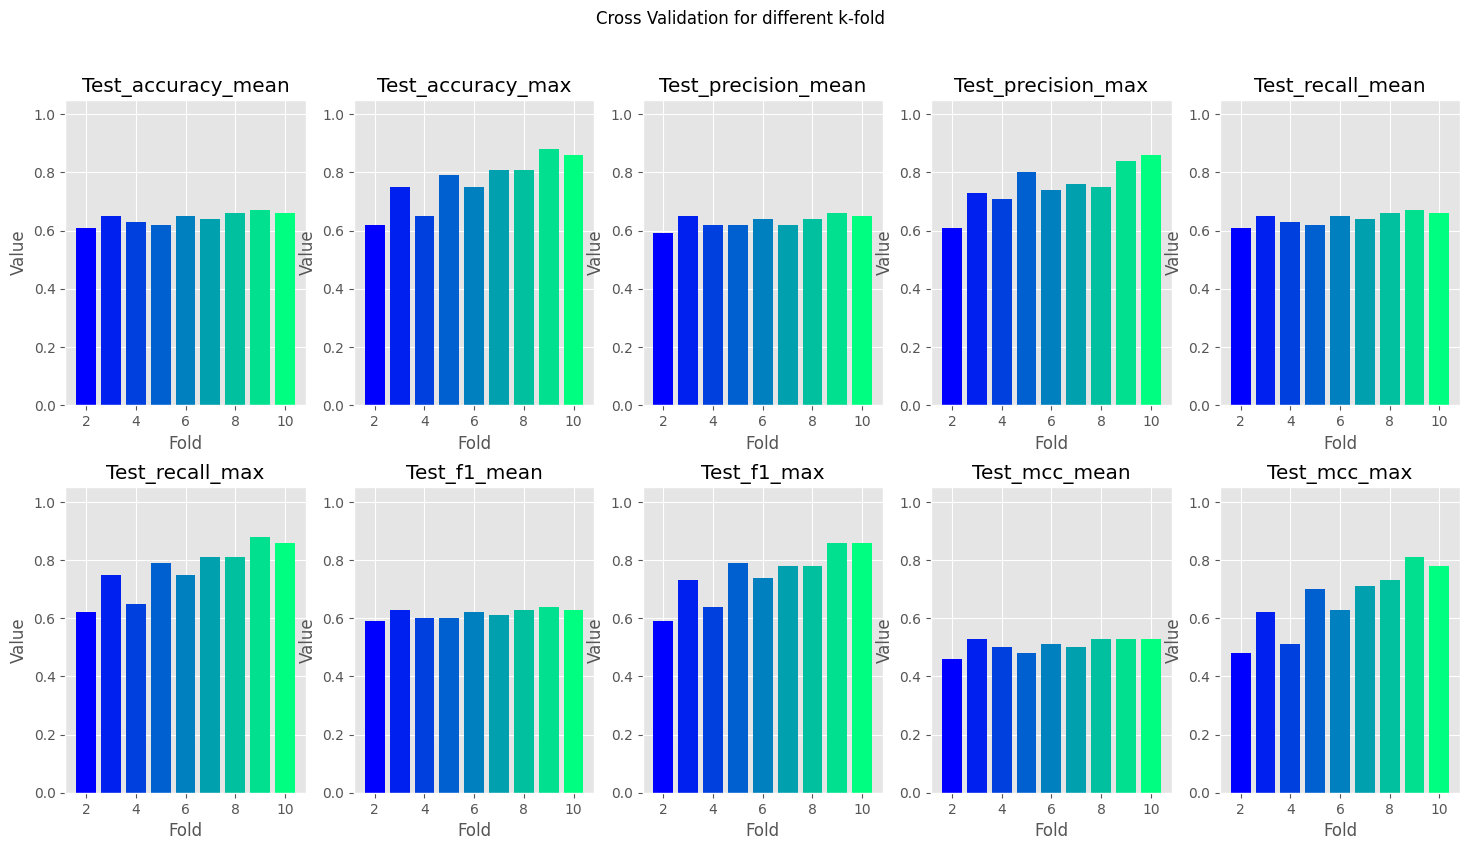

In [ ]:
df = glass_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold (shuffle=True) - Glass dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Stratified KFold

In [ ]:
glass_results = {}
knn = KNeighborsClassifier()

for k in range(2, 11):
	cv = StratifiedKFold(n_splits=k, shuffle=False)
	scores = cross_validate(knn, glass_X_df, glass_y_df['Type_of_glass'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	glass_results[k] = mean_scores

glass_results_df = pd.DataFrame(glass_results)
display(glass_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.58,0.63,0.62,0.63,0.64,0.63,0.63,0.65,0.66
test_accuracy_max,0.58,0.65,0.66,0.69,0.72,0.71,0.70,0.78,0.76
test_precision_mean,0.54,0.57,0.58,0.58,0.61,0.60,0.56,0.61,0.61
test_precision_max,0.55,0.61,0.63,0.71,0.71,0.79,0.73,0.71,0.81
test_recall_mean,0.58,0.63,0.62,0.63,0.64,0.63,0.63,0.65,0.66
test_recall_max,0.58,0.65,0.66,0.69,0.72,0.71,0.70,0.78,0.76
test_f1_mean,0.54,0.59,0.58,0.58,0.59,0.59,0.57,0.61,0.61
test_f1_max,0.54,0.61,0.62,0.65,0.70,0.69,0.69,0.73,0.70
test_mcc_mean,0.43,0.49,0.48,0.50,0.51,0.51,0.49,0.53,0.55
test_mcc_max,0.45,0.53,0.54,0.60,0.61,0.65,0.63,0.70,0.69


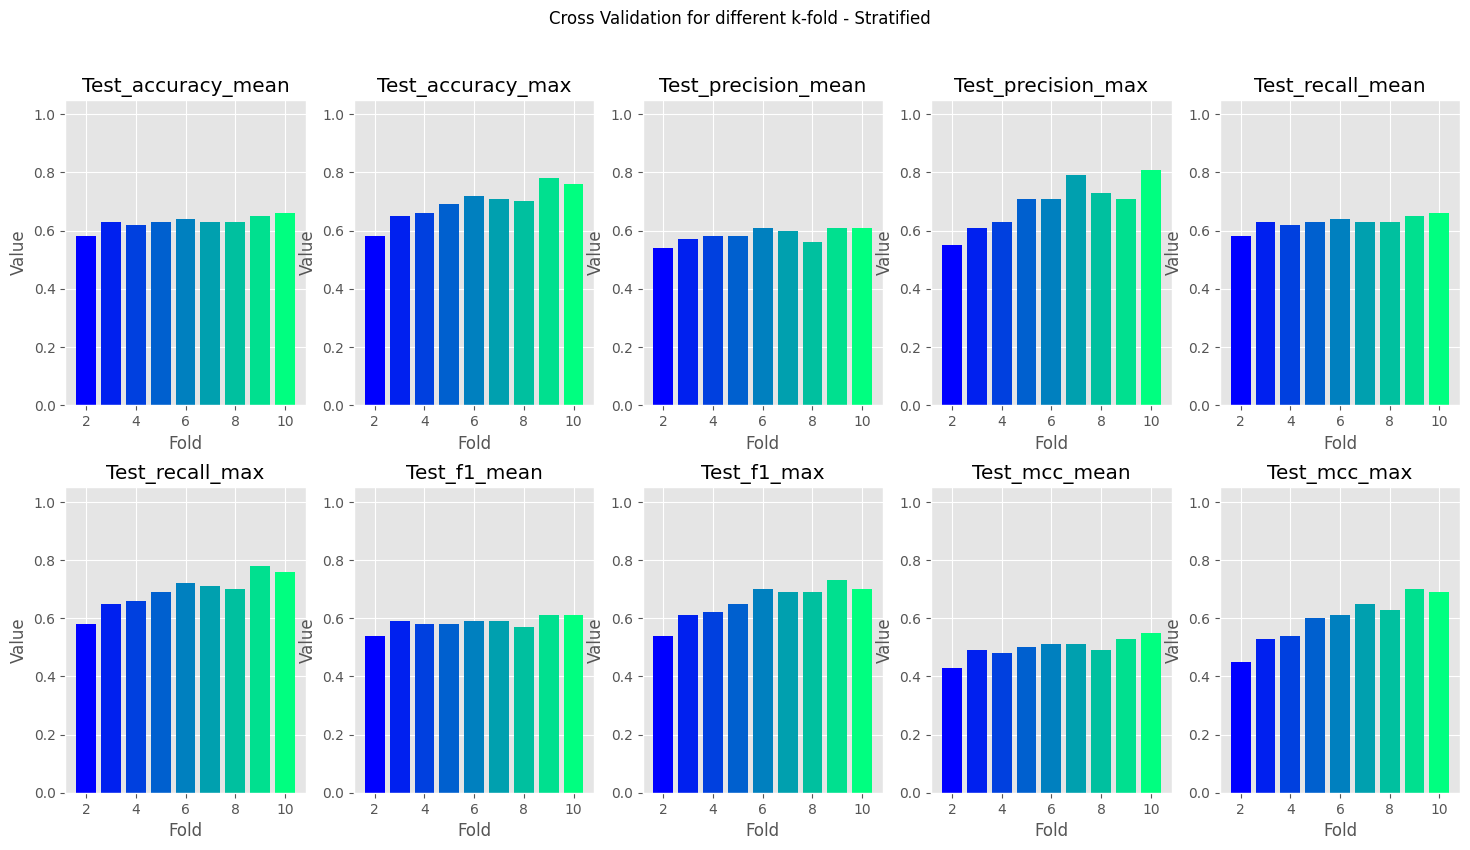

In [ ]:
df = glass_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Stratified - Glass dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Repeated KFold

In [ ]:
knn = KNeighborsClassifier()
glass_results = {}

for k in range(2, 11):
	cv = RepeatedKFold(n_splits=k, random_state=20, n_repeats=3)
	scores = cross_validate(knn, glass_X_df, glass_y_df['Type_of_glass'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	glass_results[k] = mean_scores

glass_results_df = pd.DataFrame(glass_results)
display(glass_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.63,0.64,0.64,0.64,0.65,0.64,0.65,0.66,0.66
test_accuracy_max,0.67,0.75,0.70,0.79,0.75,0.81,0.81,0.88,0.86
test_precision_mean,0.60,0.61,0.62,0.61,0.62,0.61,0.62,0.64,0.65
test_precision_max,0.69,0.73,0.71,0.80,0.74,0.76,0.79,0.84,0.86
test_recall_mean,0.63,0.64,0.64,0.64,0.65,0.64,0.65,0.66,0.66
test_recall_max,0.67,0.75,0.70,0.79,0.75,0.81,0.81,0.88,0.86
test_f1_mean,0.60,0.61,0.61,0.61,0.62,0.61,0.62,0.63,0.63
test_f1_max,0.66,0.73,0.68,0.79,0.74,0.78,0.80,0.86,0.86
test_mcc_mean,0.48,0.51,0.50,0.51,0.51,0.50,0.52,0.53,0.54
test_mcc_max,0.57,0.62,0.57,0.70,0.63,0.71,0.73,0.81,0.78


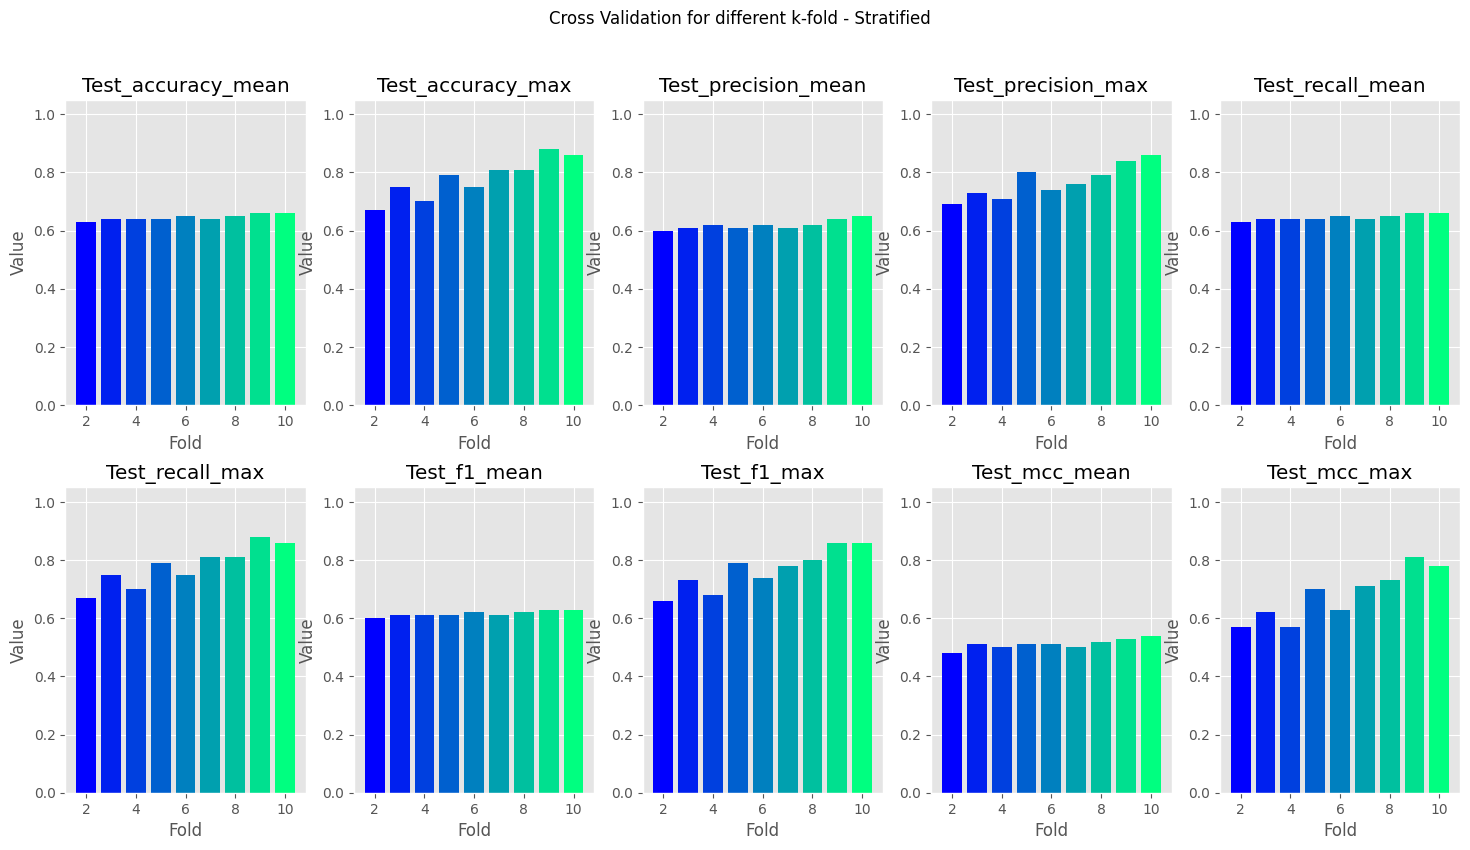

In [ ]:
df = glass_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Repeated - Glass dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.3)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

#### Repeated StratifiedKFold

In [ ]:
knn = KNeighborsClassifier()
glass_results = {}

for k in range(2, 11):
	cv = RepeatedStratifiedKFold(n_splits=k, random_state=20, n_repeats=3)
	scores = cross_validate(knn, glass_X_df, glass_y_df['Type_of_glass'], cv=cv, scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	glass_results[k] = mean_scores

glass_results_df = pd.DataFrame(glass_results)
display(glass_results_df)

,2,3,4,5,6,7,8,9,10
test_accuracy_mean,0.63,0.66,0.66,0.68,0.67,0.67,0.67,0.67,0.67
test_accuracy_max,0.66,0.74,0.74,0.77,0.72,0.81,0.78,0.83,0.82
test_precision_mean,0.60,0.64,0.62,0.66,0.63,0.63,0.62,0.63,0.62
test_precision_max,0.68,0.71,0.70,0.80,0.71,0.79,0.74,0.73,0.76
test_recall_mean,0.63,0.66,0.66,0.68,0.67,0.67,0.67,0.67,0.67
test_recall_max,0.66,0.74,0.74,0.77,0.72,0.81,0.78,0.83,0.82
test_f1_mean,0.60,0.64,0.63,0.65,0.63,0.64,0.63,0.63,0.63
test_f1_max,0.64,0.70,0.71,0.75,0.69,0.78,0.74,0.75,0.78
test_mcc_mean,0.49,0.54,0.53,0.57,0.54,0.55,0.55,0.55,0.55
test_mcc_max,0.56,0.64,0.64,0.69,0.63,0.75,0.71,0.76,0.76


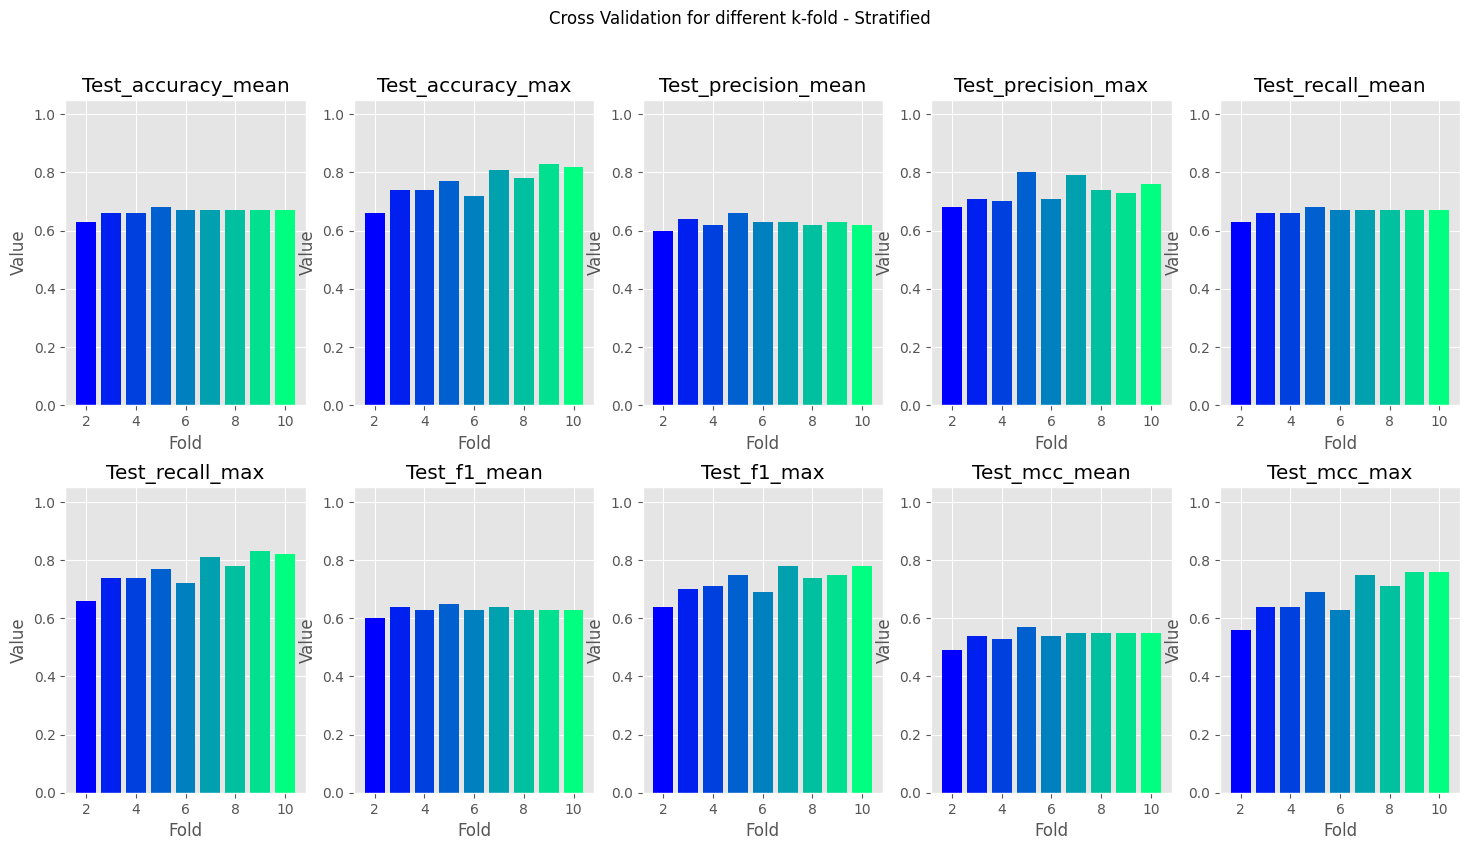

In [ ]:
df = glass_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - RepeatedStratified - Glass dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(df.index, colors):
        ax.bar(i, df.loc[i, metric], color=color, label=f'Fold {i+1}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Fold')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)

fig.subplots_adjust(hspace=0.27, wspace=0.4)

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

### KFolds Comparison

In [ ]:
k = 8
cvs = [
       ("RepeatedStratifiedKFold", RepeatedStratifiedKFold(n_splits=k, random_state=20, n_repeats=3)),
       ("RepeatedKFold", RepeatedKFold(n_splits=k, random_state=20, n_repeats=3)),
       ("StratifiedKFold", StratifiedKFold(n_splits=k, shuffle=False)),
       ("KFold_shuffle", KFold(n_splits=k, shuffle=True, random_state=20)),
       ("KFold_simple", KFold(n_splits=k, shuffle=False)),
    ]

warnings.filterwarnings("ignore")

glass_results = {}
knn = KNeighborsClassifier()

for cv in cvs:
	scores = cross_validate(knn, glass_X_df, glass_y_df['Type_of_glass'], cv=cv[1], scoring=scoring)
	mean_scores = {}
	for metric, values in scores.items():
		if 'time' not in metric:
			mean_scores[f"{metric}_mean"] = round(np.mean(values), 2)
			mean_scores[f"{metric}_max"] = round(np.max(values), 2)

	glass_results[str(cv[0])] = mean_scores

glass_results_df = pd.DataFrame(glass_results)
display(glass_results_df)

,RepeatedStratifiedKFold,RepeatedKFold,StratifiedKFold,KFold_shuffle,KFold_simple
test_accuracy_mean,0.67,0.65,0.63,0.66,0.41
test_accuracy_max,0.78,0.81,0.70,0.81,0.93
test_precision_mean,0.62,0.62,0.56,0.64,0.65
test_precision_max,0.74,0.79,0.73,0.75,1.00
test_recall_mean,0.67,0.65,0.63,0.66,0.41
test_recall_max,0.78,0.81,0.70,0.81,0.93
test_f1_mean,0.63,0.62,0.57,0.63,0.48
test_f1_max,0.74,0.80,0.69,0.78,0.93
test_mcc_mean,0.55,0.52,0.49,0.53,0.13
test_mcc_max,0.71,0.73,0.63,0.73,0.86


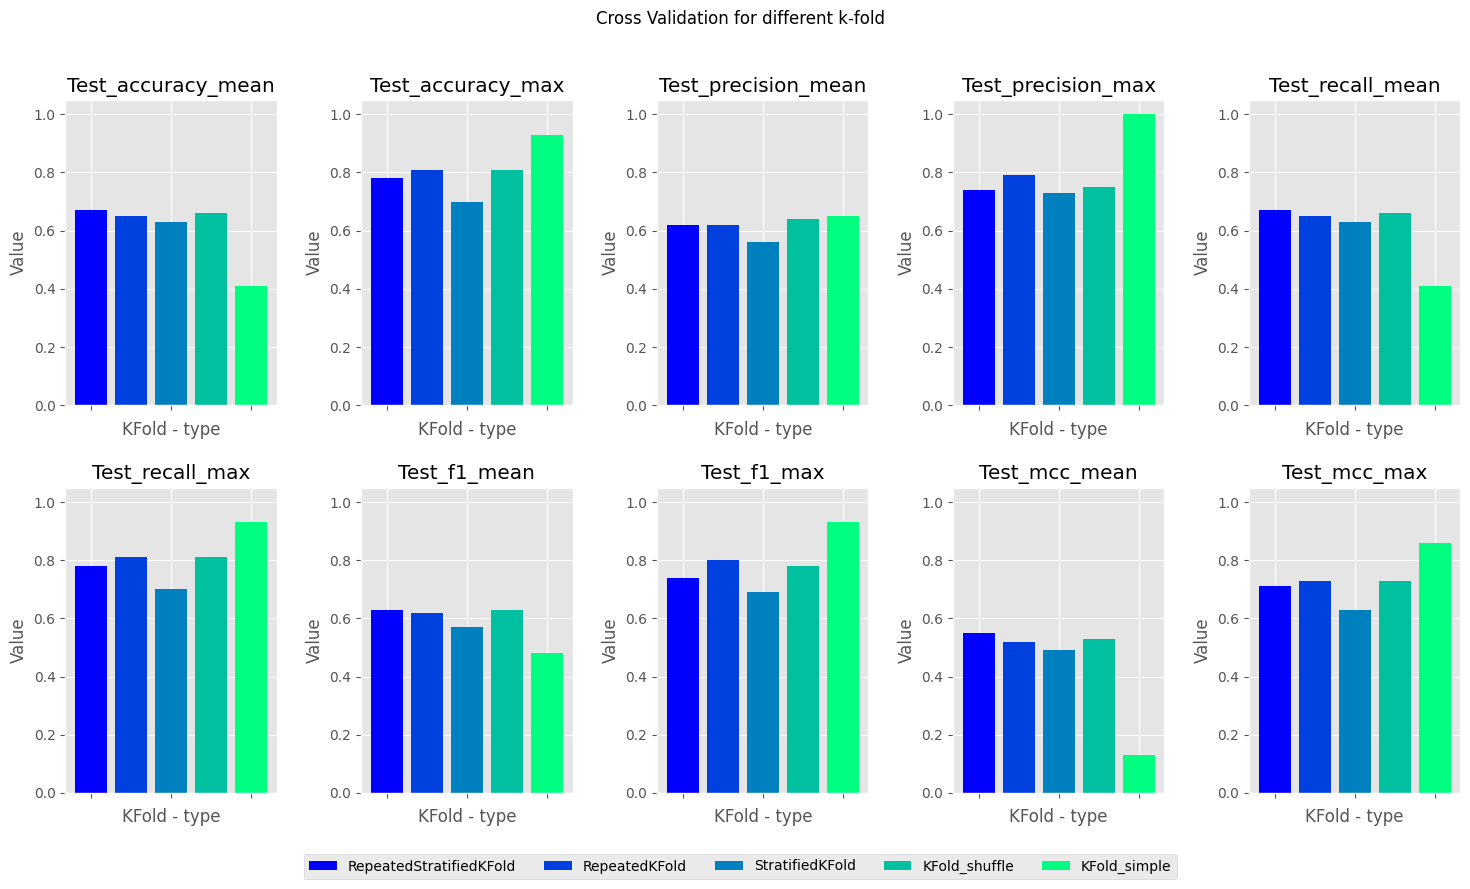

In [ ]:
df = glass_results_df.transpose()

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
fig.suptitle('Cross Validation for different k-fold - Glass dataset')
colors = plt.cm.winter(np.linspace(0, 1, len(df)))

metrics = df.columns

for ax, metric in zip(axes.flatten(), metrics):
    for i, color in zip(range(len(df.index)), colors):
        ax.bar(i, df[metric][i], color=color, label=f'{df.index[i]}')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('KFold - type')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)
    ax.set_xticklabels([])

fig.subplots_adjust(hspace=0.27, wspace=0.4)

# Create a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(df.index))

if len(metrics) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(metrics)])
    
plt.show()

### Grid Search

#### Different K in KNN

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

params = {'n_neighbors': range(1, 16)}

grid_search_n_neighbors = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_n_neighbors.fit(glass_X_df, glass_y_df['Type_of_glass'])

metrics = ['param_n_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df = pd.DataFrame(grid_search_n_neighbors.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)

display(cv_results_df)

,param_n_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
4,5,0.630869,0.568157,0.630869,0.587476,0.491951
5,6,0.626109,0.560430,0.626109,0.577770,0.489469
7,8,0.593245,0.537791,0.593245,0.542758,0.445368
1,2,0.598331,0.571632,0.598331,0.559747,0.444514
8,9,0.584116,0.539411,0.584116,0.532214,0.438856
0,1,0.584116,0.581896,0.584116,0.571673,0.437561
2,3,0.593440,0.568440,0.593440,0.562370,0.435715
3,4,0.588615,0.548336,0.588615,0.545870,0.433962
9,10,0.584116,0.526702,0.584116,0.531447,0.433233
13,14,0.584442,0.542614,0.584442,0.538631,0.427692


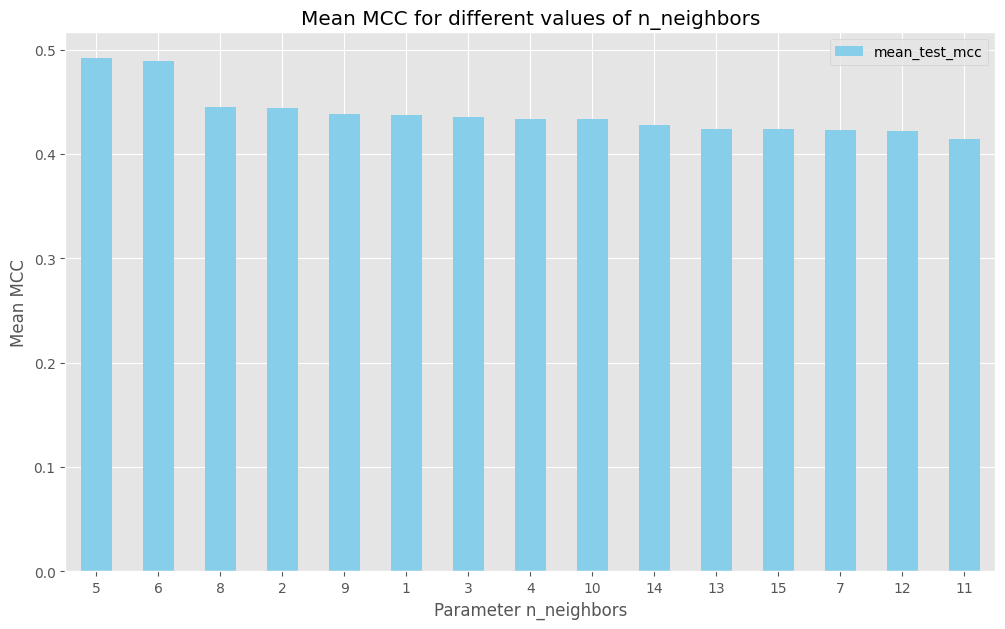

In [ ]:
cv_results_df.plot(x='param_n_neighbors', y=['mean_test_mcc'], kind='bar', figsize=(12, 7), color='skyblue')
plt.title('Mean MCC for different values of n_neighbors - Glass dataset')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Mean MCC')
plt.xticks(rotation=0)
plt.show()

#### Different weights

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

def custom_weights(distances):
    weights = np.exp(distances) / 2*distances
    return weights

params = {'weights': ['uniform', 'distance', custom_weights]}

grid_search_weights = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_weights.fit(glass_X_df, glass_y_df['Type_of_glass'])

metrics = ['param_weights', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_wg = pd.DataFrame(grid_search_weights.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)
cv_results_df_wg['param_weights'][2] = 'custom_weights'

display(cv_results_df_wg)

,param_weights,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
1,distance,0.644757,0.626359,0.644757,0.617893,0.515926
0,uniform,0.630869,0.568157,0.630869,0.587476,0.491951
2,custom_weights,0.602700,0.545132,0.602700,0.562187,0.454634


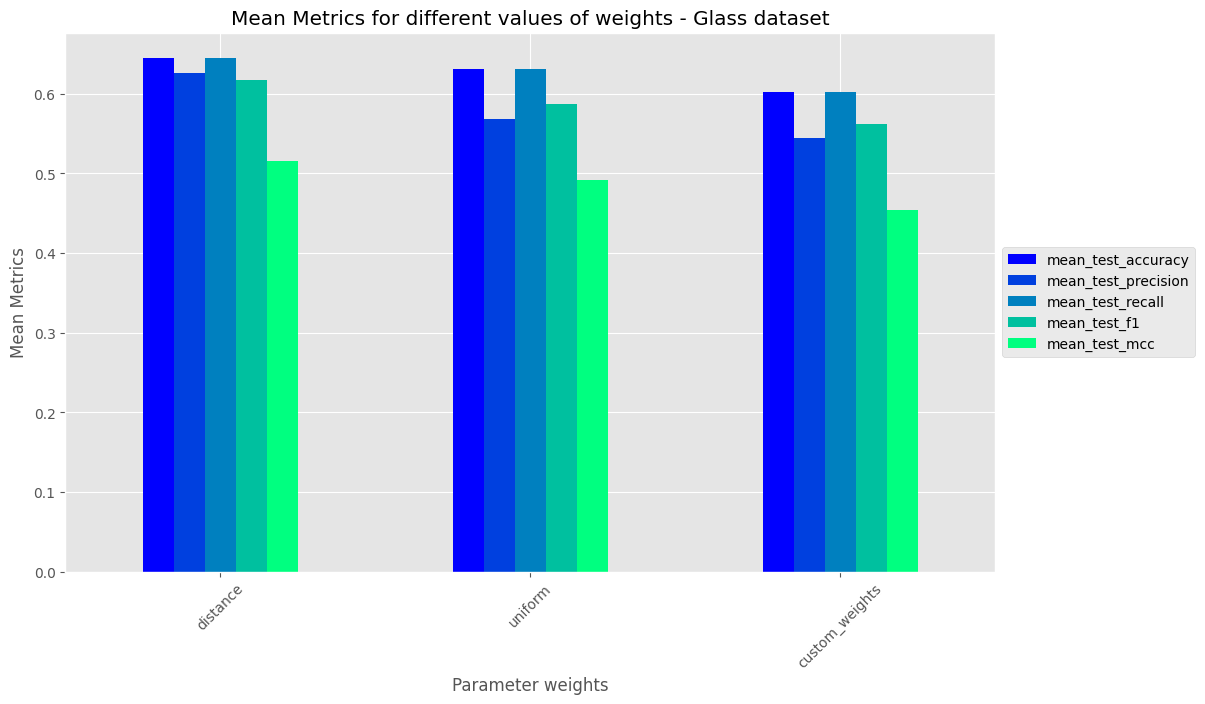

In [ ]:
ax = cv_results_df_wg.plot(x='param_weights', y=metrics[1:], kind='bar', figsize=(12, 7), colormap='winter')
plt.title('Mean Metrics for different values of weights - Glass dataset')
plt.xlabel('Parameter weights')
plt.ylabel('Mean Metrics')
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Different metrics

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

params = [{'metric': ['chebyshev', 'manhattan', 'euclidean', 'minkowski', 'canberra']},
          {'metric': ['mahalanobis'], 'metric_params': [{'VI': np.cov(glass_X_df, rowvar=False)}]}]

grid_search_metric = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_metric.fit( glass_X_df, glass_y_df['Type_of_glass'])

metrics = ['param_metric', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_metric = pd.DataFrame(grid_search_metric.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False)

display(cv_results_df_metric)

,param_metric,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
2,euclidean,0.630869,0.568157,0.630869,0.587476,0.491951
3,minkowski,0.630869,0.568157,0.630869,0.587476,0.491951
1,manhattan,0.612154,0.561376,0.612154,0.573882,0.467583
4,canberra,0.607394,0.582999,0.607394,0.570445,0.460056
5,mahalanobis,0.593375,0.559477,0.593375,0.551369,0.444528
0,chebyshev,0.546557,0.494336,0.546557,0.505474,0.368407


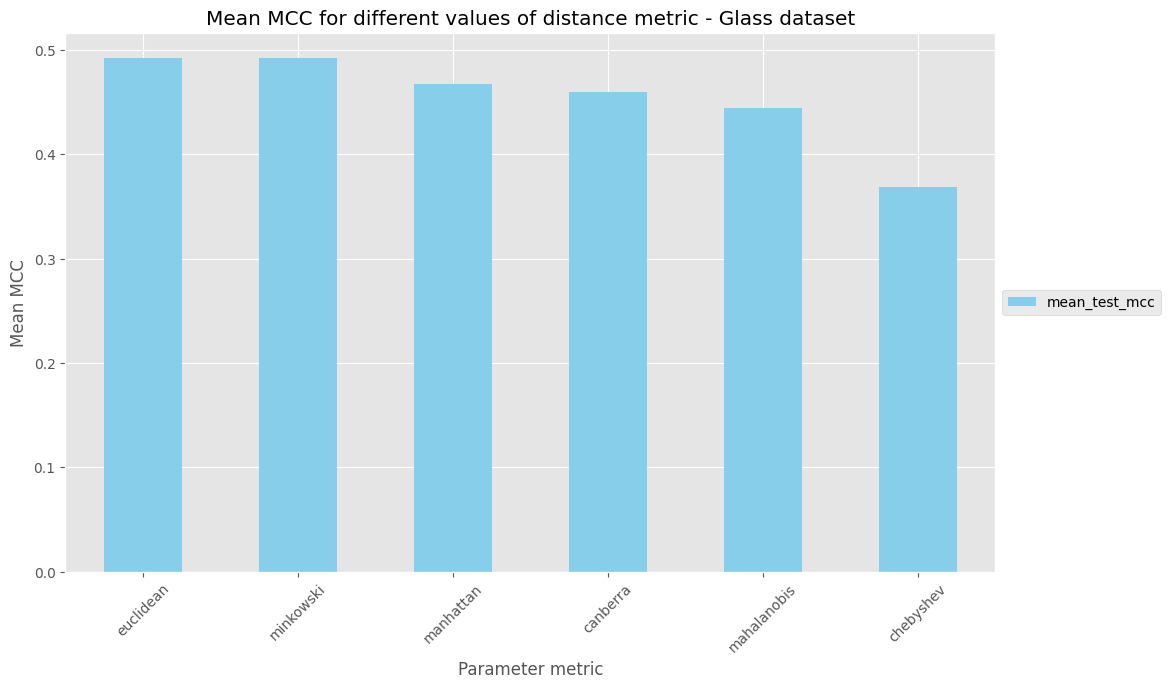

In [ ]:
cv_results_df_metric.fillna(0, inplace=True)
ax = cv_results_df_metric.plot(x='param_metric', y=['mean_test_mcc'], kind='bar', figsize=(12, 7), color='skyblue')
plt.title('Mean MCC for different values of distance metric - Glass dataset')
plt.xlabel('Parameter metric')
plt.ylabel('Mean MCC')
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### All three parameters

In [ ]:
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=False)

def custom_weights(distances):
    weights = np.exp(distances) / 2*distances
    return weights

params = [
    {'weights': ['uniform', 'distance', custom_weights], 'n_neighbors': range(1, 16),
     'metric': ['chebyshev', 'manhattan', 'euclidean', 'minkowski', 'canberra']},
    {'weights': ['uniform', 'distance', custom_weights], 'n_neighbors': range(1, 16),
     'metric': ['mahalanobis'], 'metric_params': [{'VI': np.cov(glass_X_df, rowvar=False)}]}
]

grid_search_all = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring=scoring, refit=False)
grid_search_all.fit( glass_X_df, glass_y_df['Type_of_glass'])

metrics = ['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
           'mean_test_f1', 'mean_test_mcc']
cv_results_df_all = pd.DataFrame(grid_search_all.cv_results_)[metrics].sort_values(by='mean_test_mcc', ascending=False).head(10)

params_df = pd.json_normalize(cv_results_df_all['params'])
cv_results_df_all = pd.concat(
    					[params_df.reset_index(drop=True),
                		cv_results_df_all.drop('params', axis=1).reset_index(drop=True)],
                        axis=1
                    )

display(cv_results_df_all)

,metric,n_neighbors,weights,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc
0,manhattan,11,distance,0.644757,0.612141,0.644757,0.604841,0.522859
1,manhattan,9,distance,0.639997,0.613313,0.639997,0.601758,0.518476
2,minkowski,5,distance,0.644757,0.626359,0.644757,0.617893,0.515926
3,euclidean,5,distance,0.644757,0.626359,0.644757,0.617893,0.515926
4,canberra,4,distance,0.644823,0.630613,0.644823,0.620243,0.514404
5,manhattan,7,distance,0.640063,0.597855,0.640063,0.603860,0.514369
6,manhattan,10,distance,0.635433,0.604803,0.635433,0.594125,0.511694
7,canberra,8,distance,0.635237,0.616307,0.635237,0.600316,0.506780
8,manhattan,6,distance,0.635303,0.601987,0.635303,0.604784,0.505117
9,canberra,1,uniform,0.630673,0.622359,0.630673,0.612826,0.501918


## Iris KNN Plot

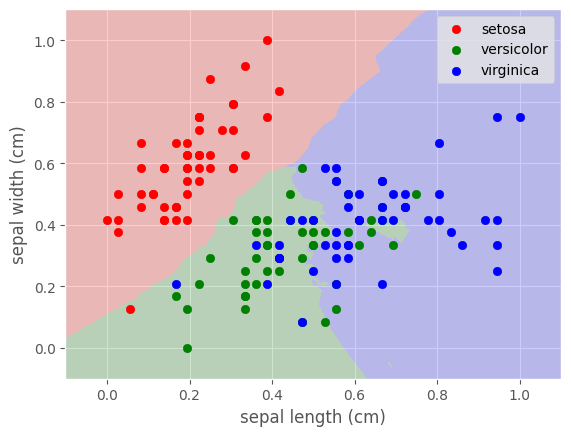

In [ ]:
def plot_iris_knn():
	X = iris_X_df.iloc[:, :2]
	y = iris_y_df['species']

	knn = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='minkowski')
	knn.fit(X, y)

	x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
	y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
	xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
						 np.linspace(y_min, y_max, 500))
	predict_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
	Z = knn.predict(predict_data)
	Z = Z.reshape(xx.shape)
	plt.figure()
	plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['red', 'green', 'blue']), alpha=0.2)

	colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

	grouped_data = iris_X_df.groupby(iris_y_df['species_names'])

	for sp, group in grouped_data:
		plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'], c=colors[sp], label=sp)

	plt.xlabel('sepal length (cm)')
	plt.ylabel('sepal width (cm)')
	plt.axis('tight')
	plt.legend()
	plt.show()

plot_iris_knn()